<a href="https://colab.research.google.com/github/Mariam049/Jupeter-Notebook-Test/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy==1.19.5

  Using cached numpy-1.19.5.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)


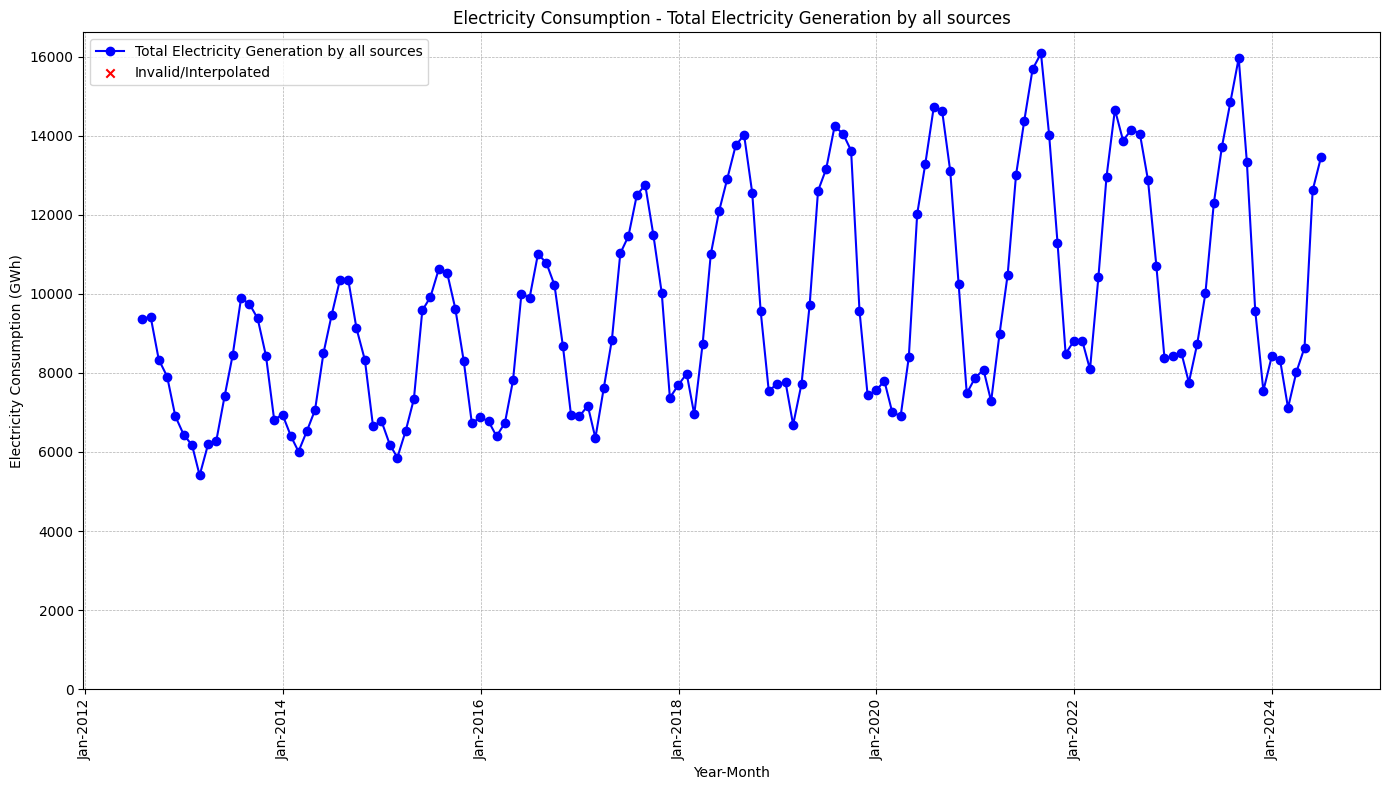

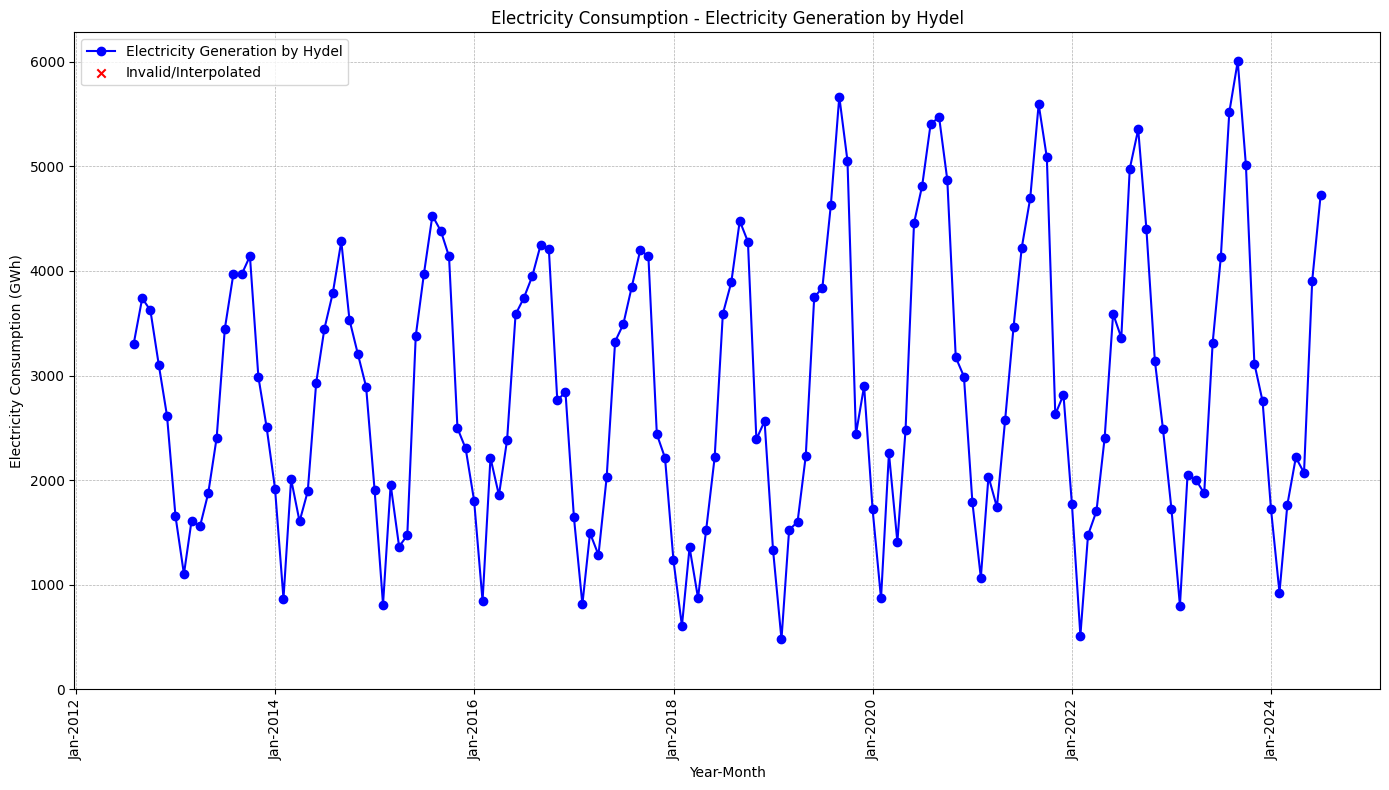

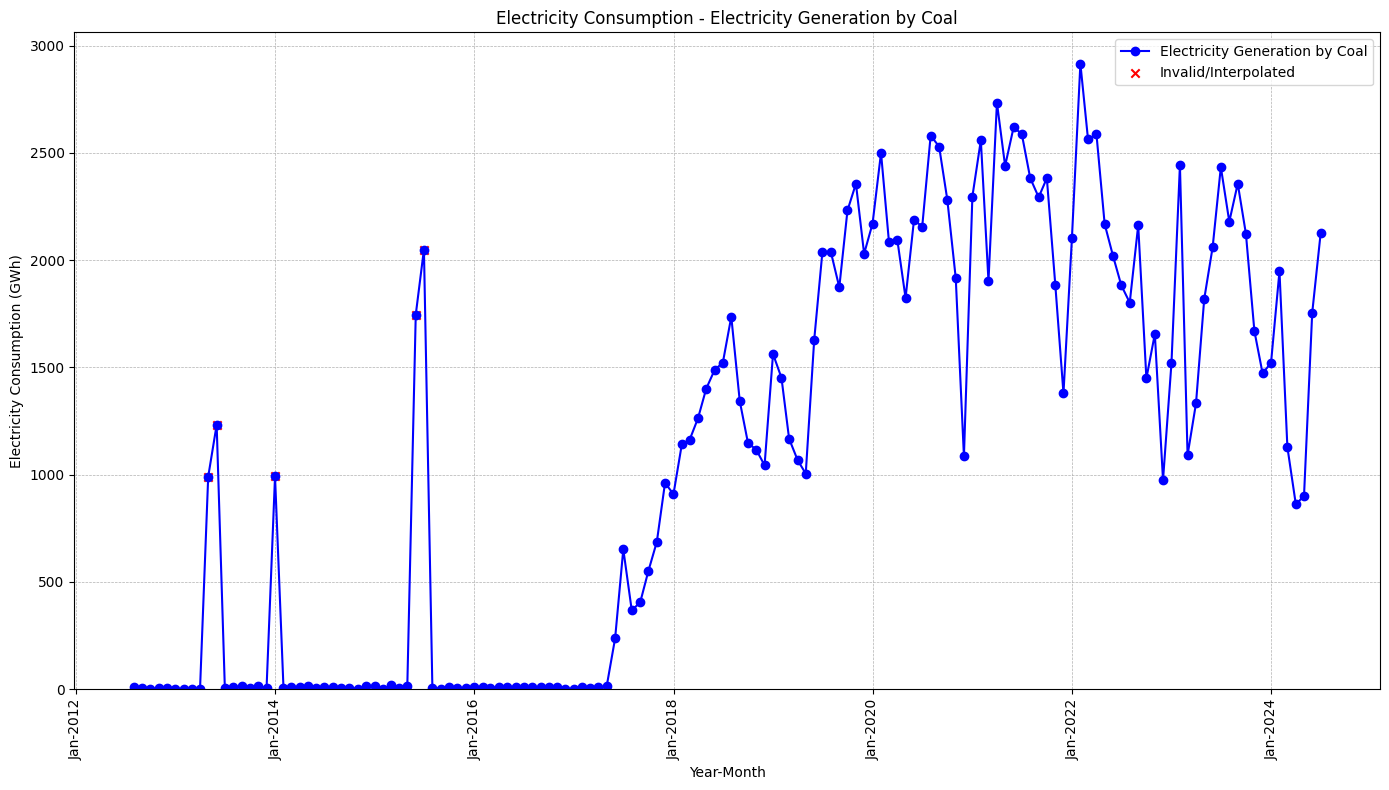

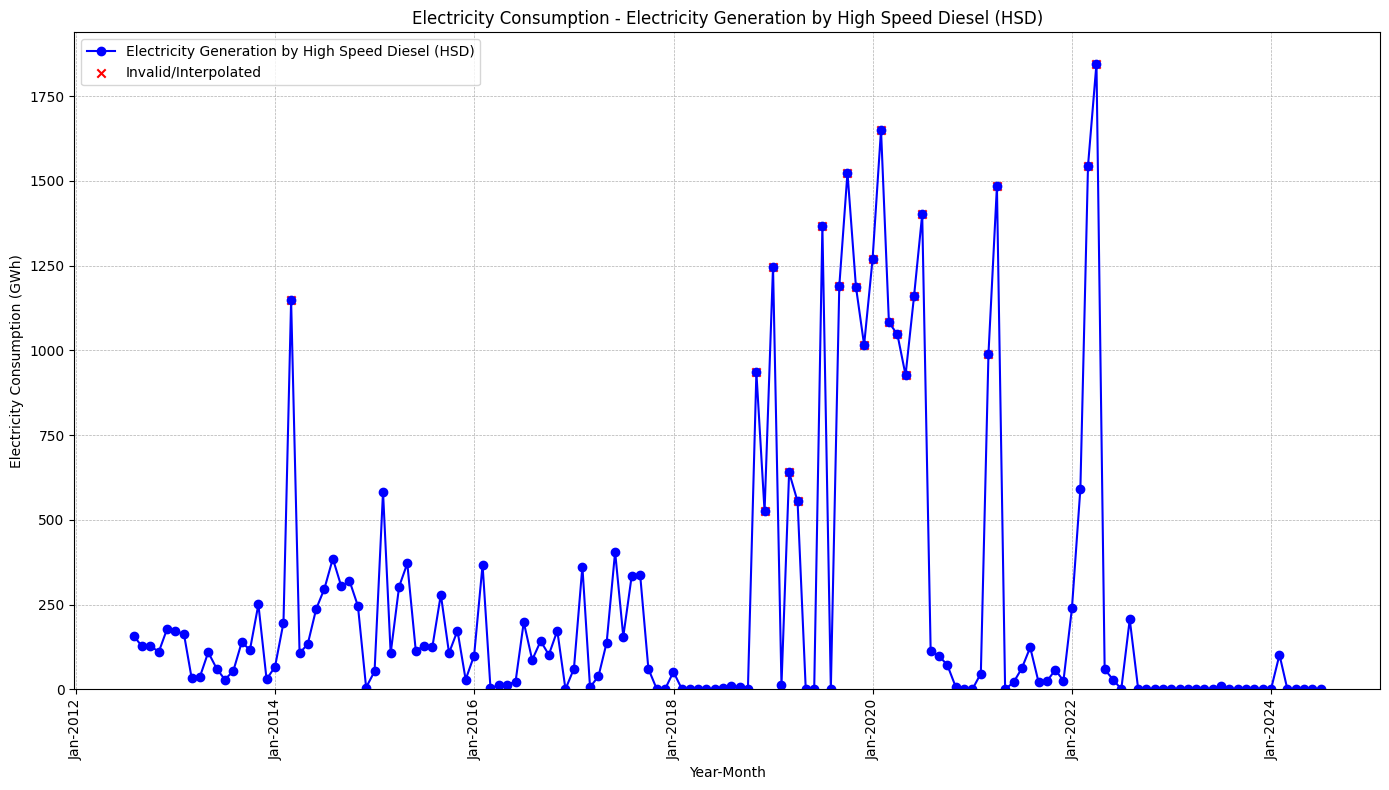

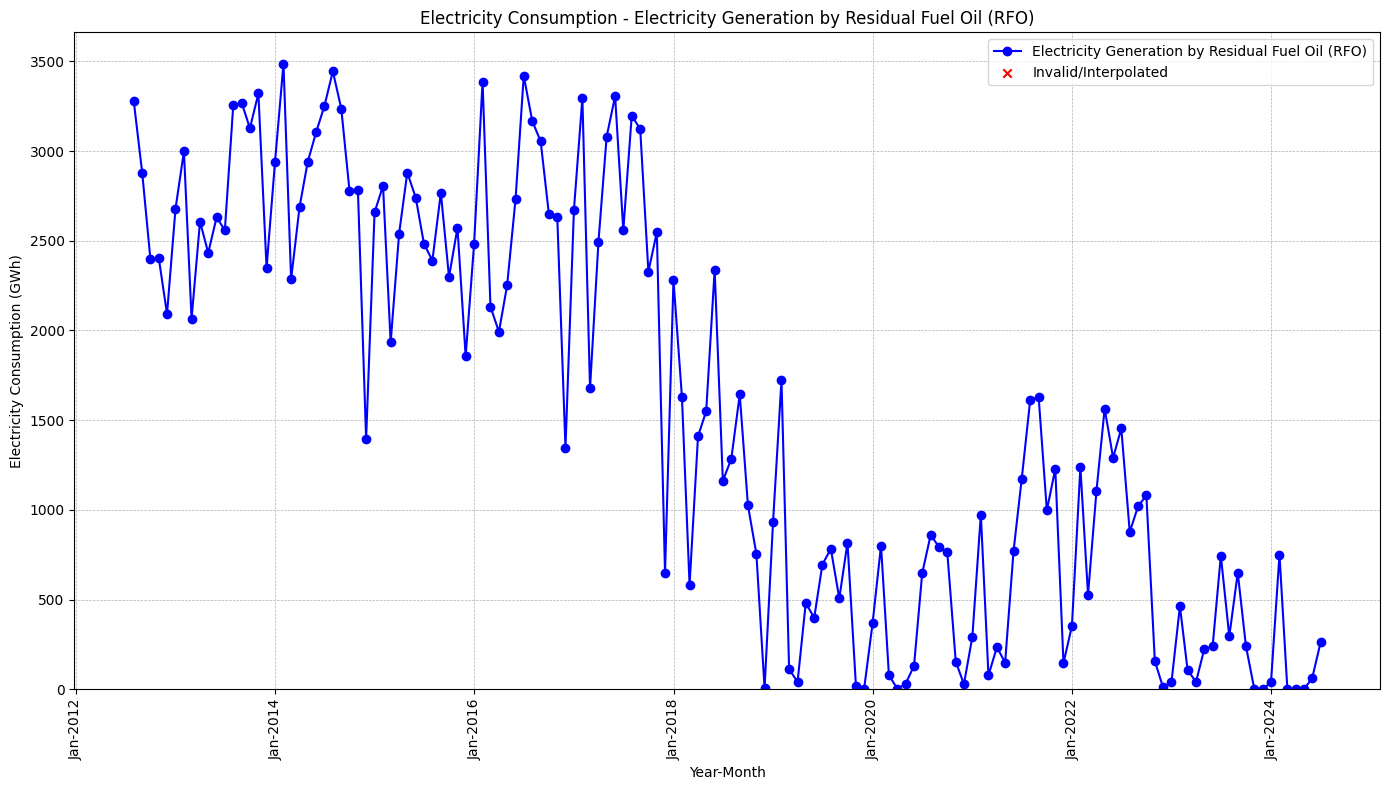

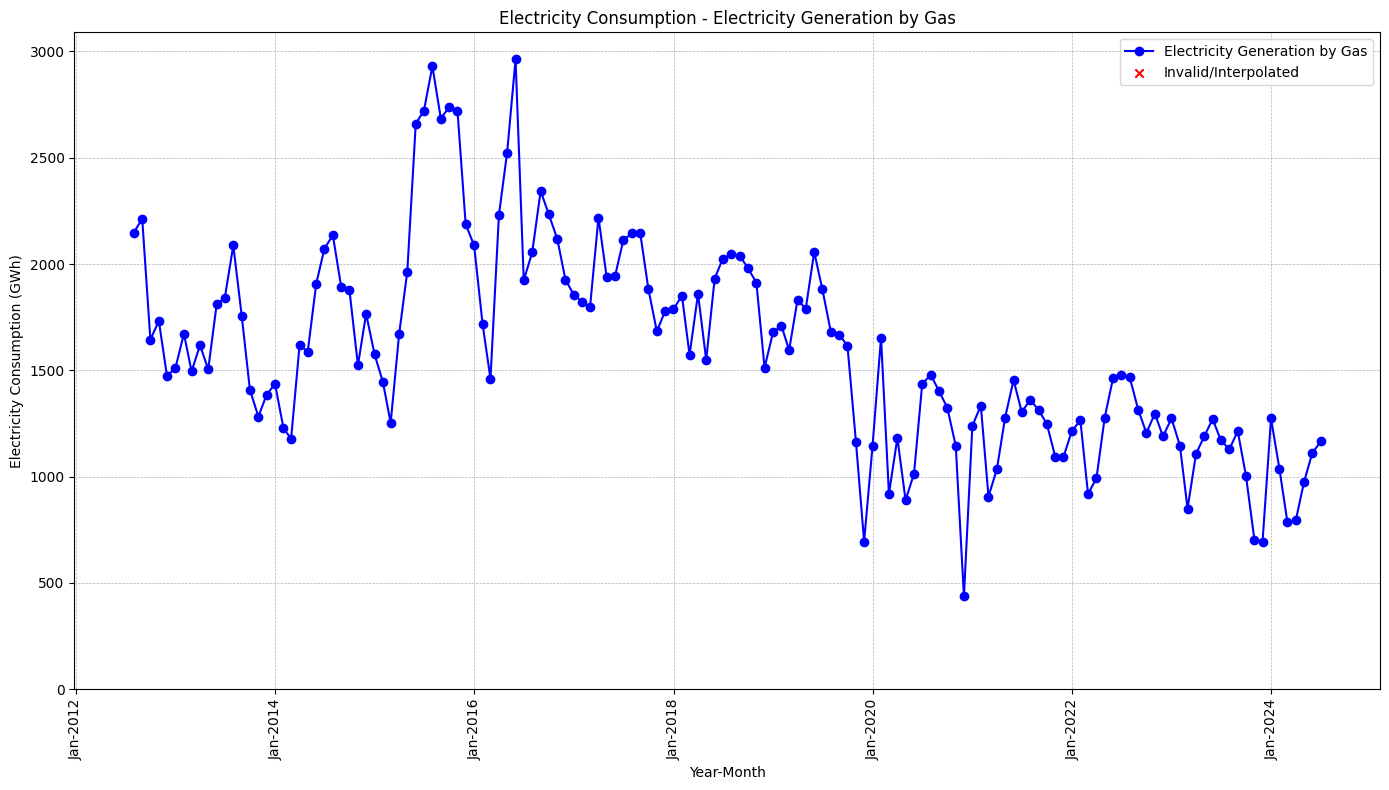

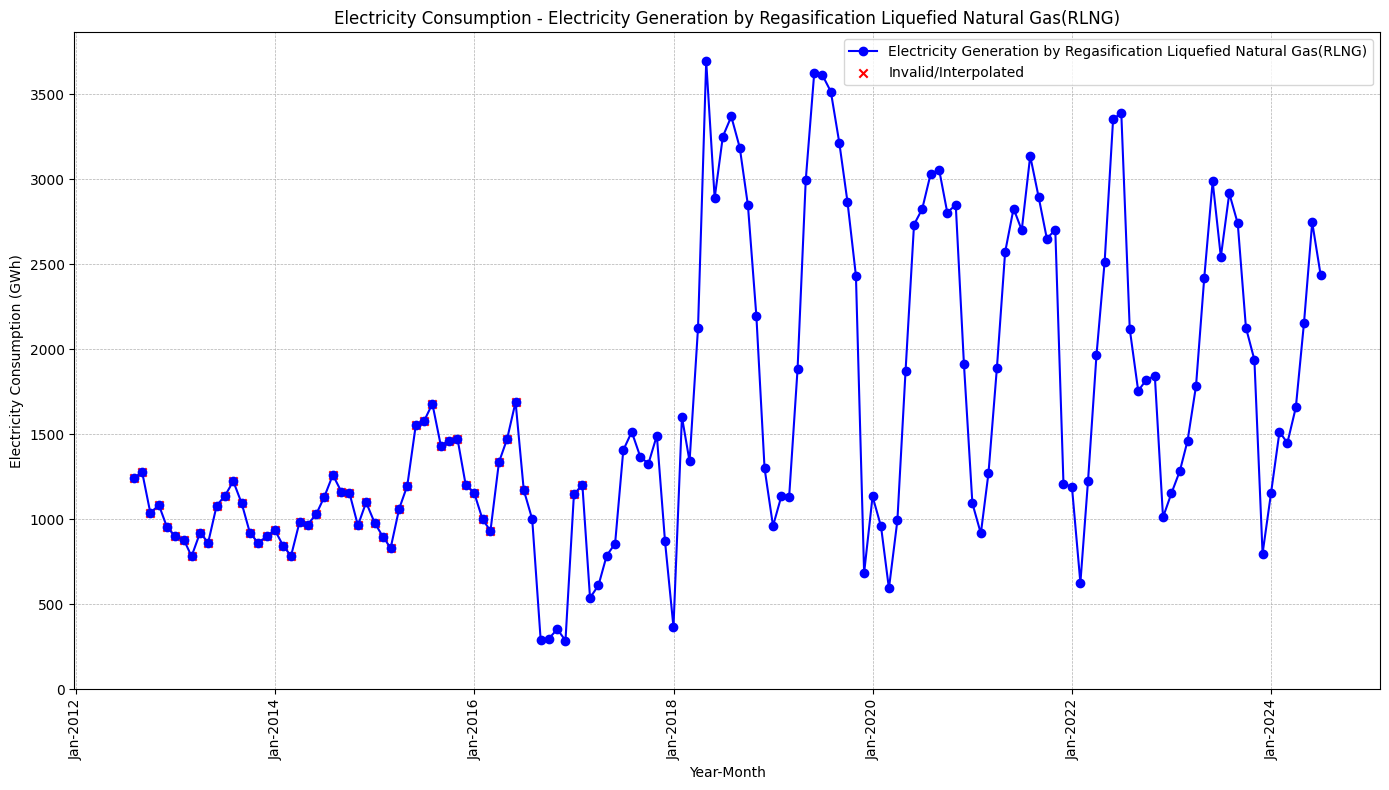

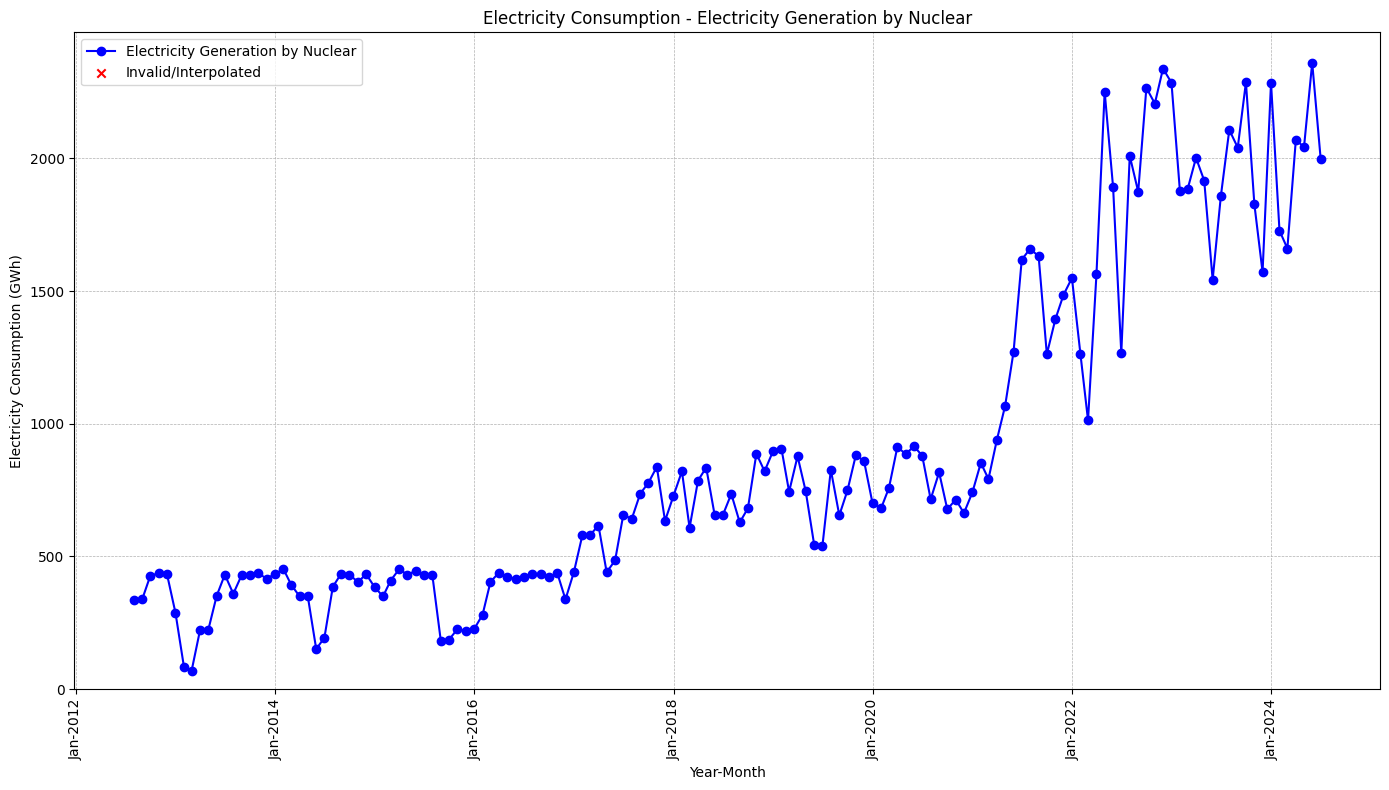

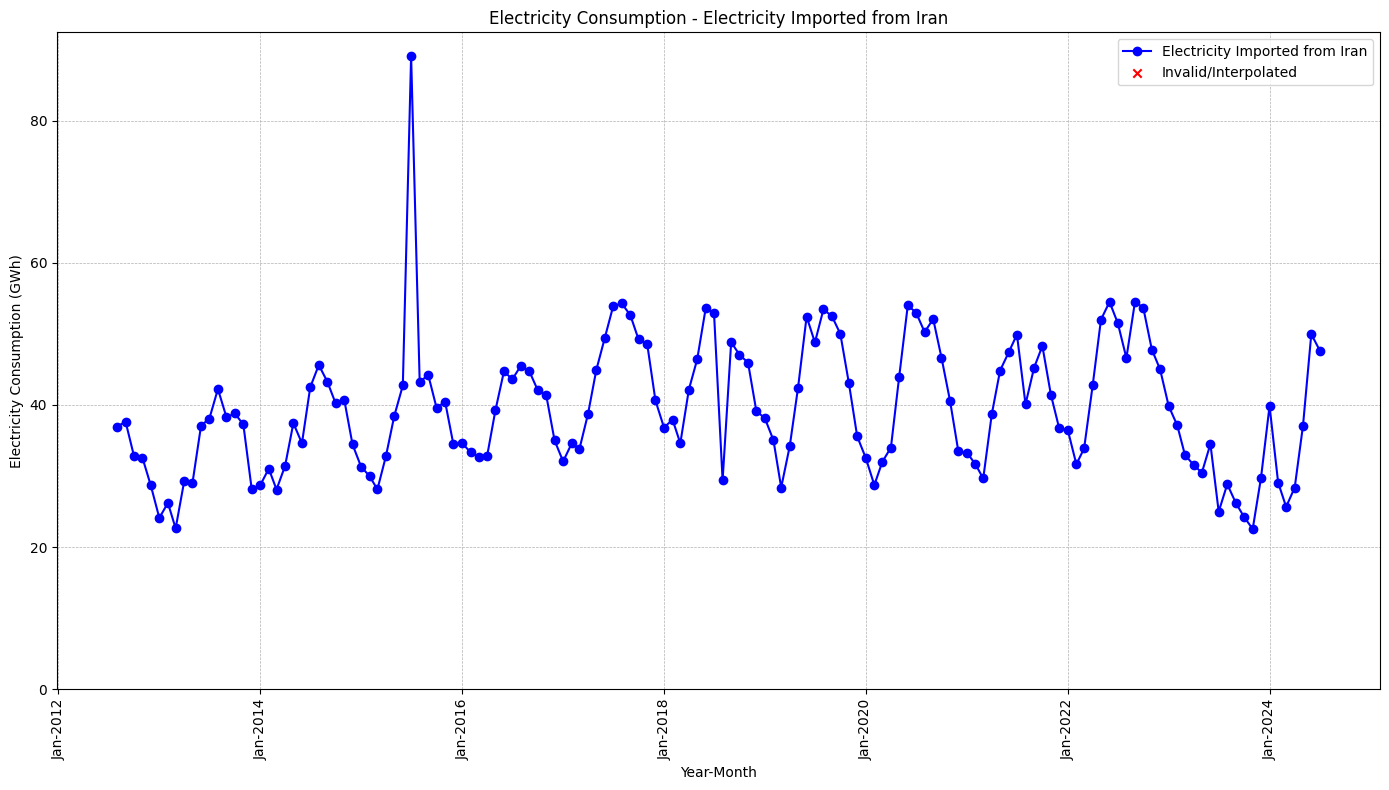

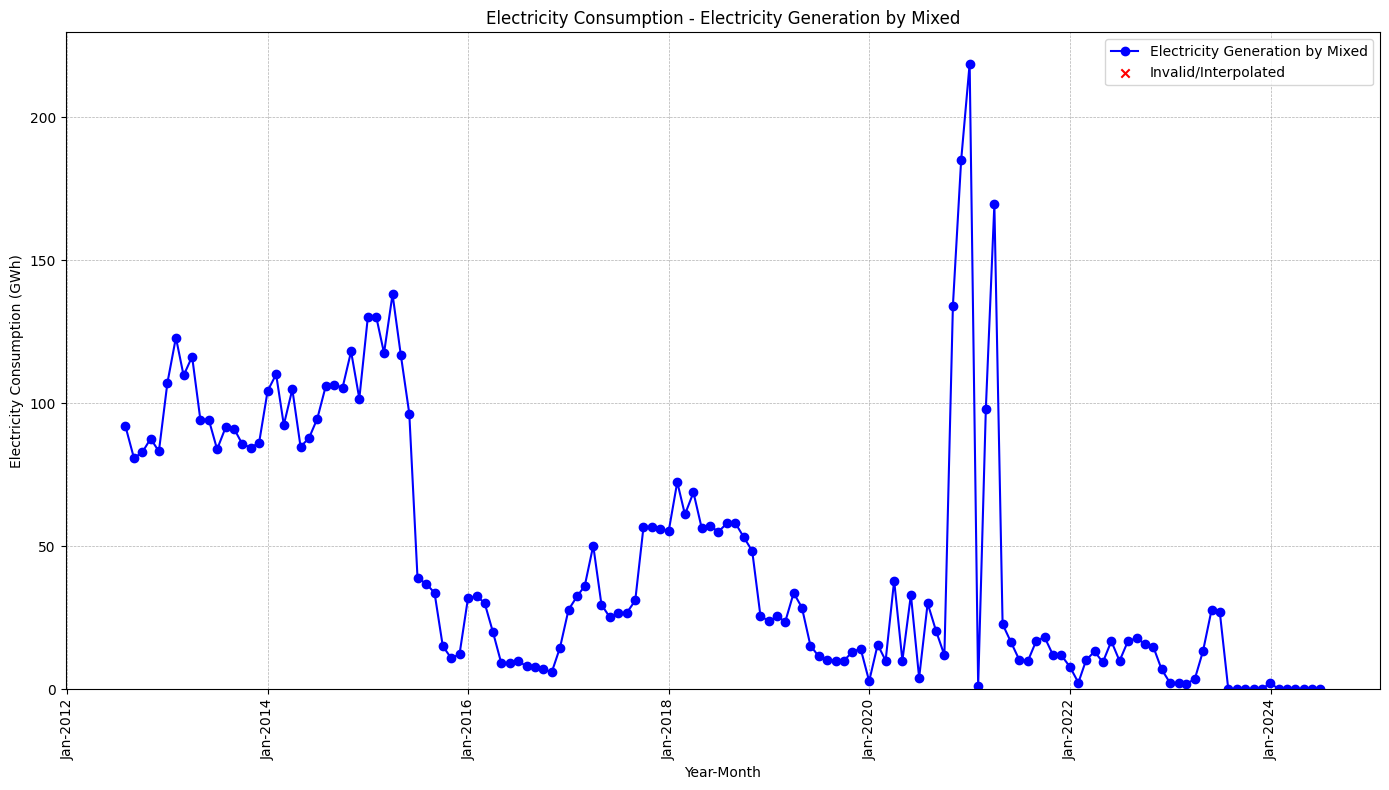

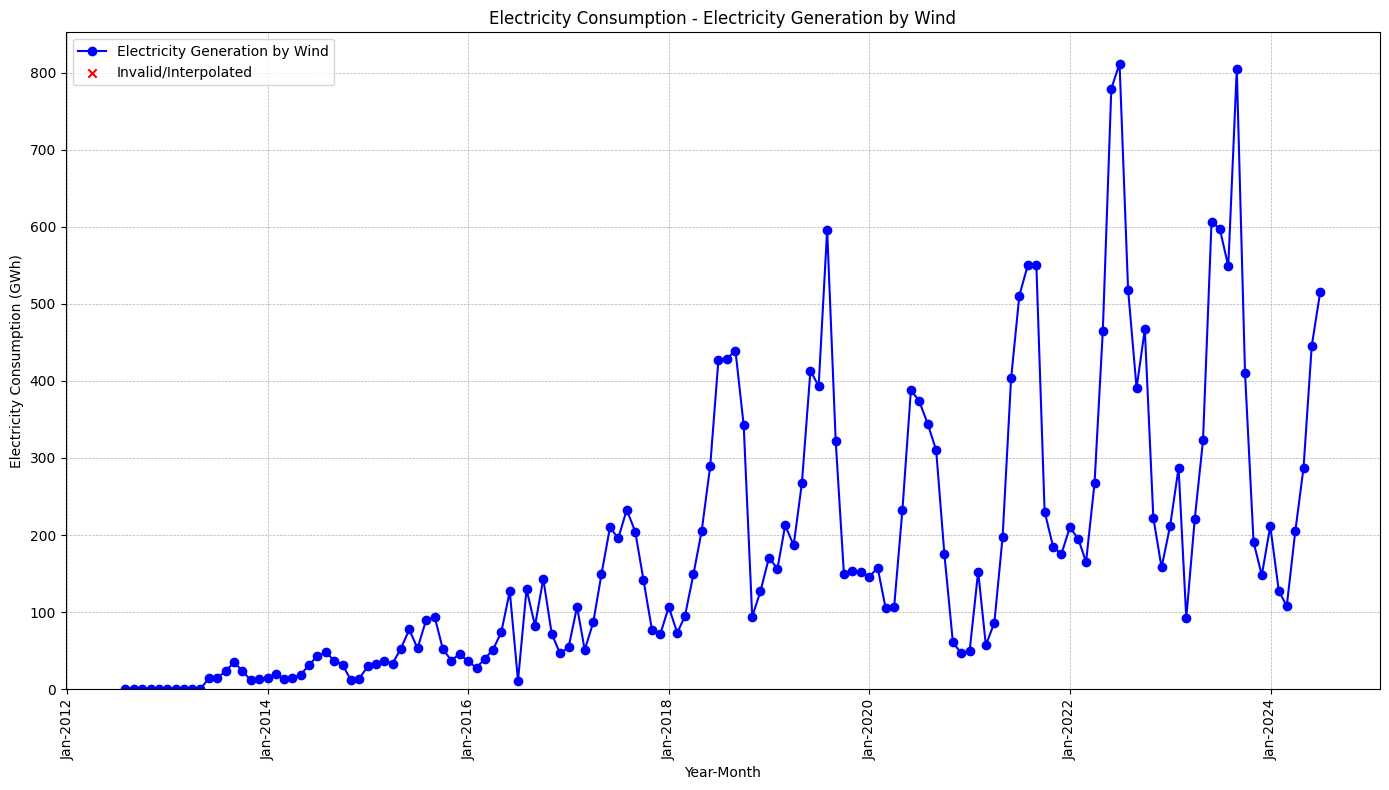

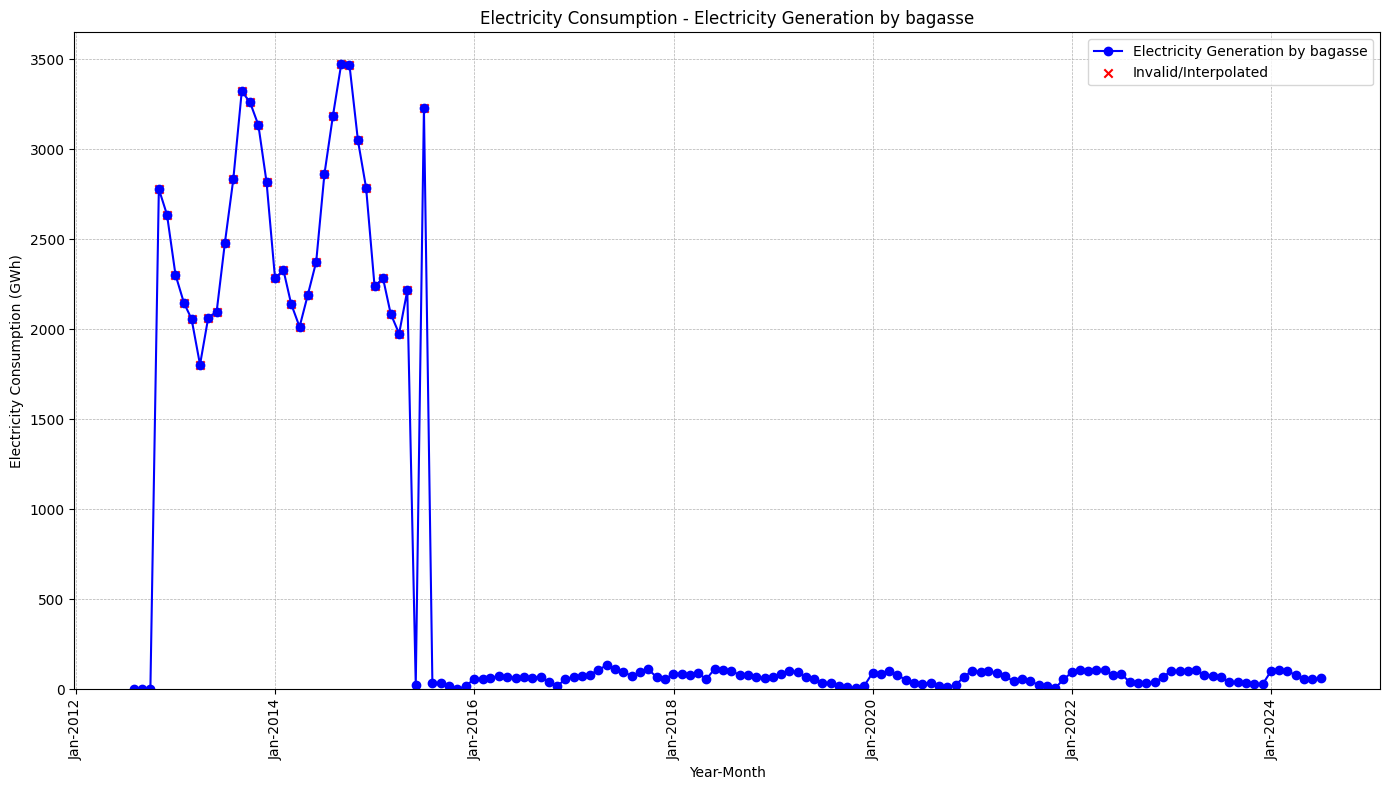

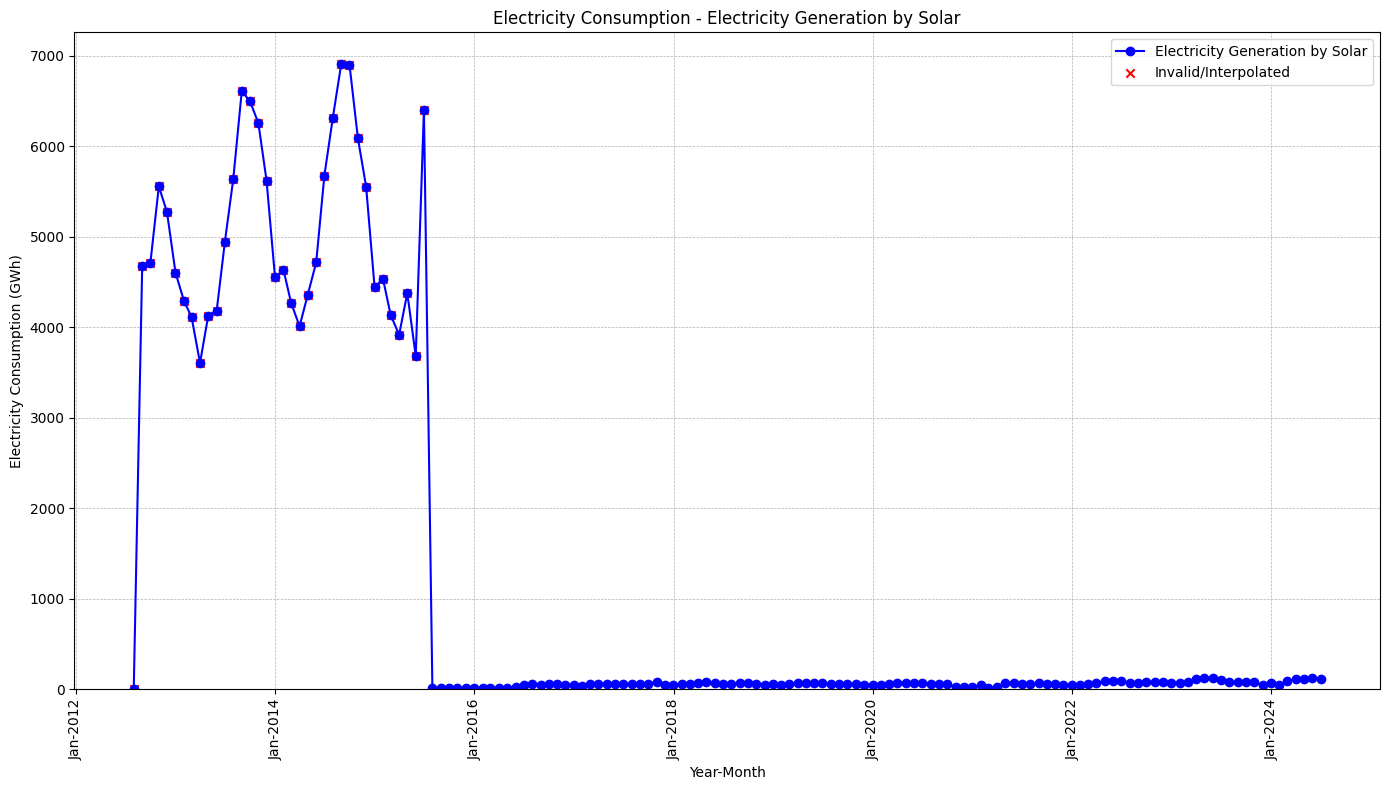

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

# Load the dataset
df = pd.read_csv('dataset.csv')

# Convert 'Observation Date' to datetime, and 'Observation Value' to numeric
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df['Observation Value'] = pd.to_numeric(df['Observation Value'], errors='coerce')

# Identify invalid values (non-numeric or NaNs in 'Observation Value')
invalid_values = df['Observation Value'].isna()

# Handle invalid values: Option 1 - Fill with interpolated values
df['Observation Value'] = df['Observation Value'].interpolate(method='linear', limit_direction='both')

# Plot for each series name
series_names = df['Series name'].unique()

def custom_date_formatter(date, pos):
    if date.month == 1:
        return date.strftime('%b-%Y')  # Show full year for January
    else:
        return date.strftime('%b-%y')  # Show abbreviated year for other months

for series in series_names:
    plt.figure(figsize=(14, 8))

    # Filter data by series
    series_df = df[df['Series name'] == series]

    # Sort by 'Observation Date'
    series_df = series_df.sort_values(by='Observation Date')

    # Plot valid values
    plt.plot(series_df['Observation Date'], series_df['Observation Value'], label=series, marker='o', color='blue')

    # Plot invalid values with a different color and marker
    invalid_dates = series_df.loc[invalid_values, 'Observation Date']
    invalid_obs_values = series_df.loc[invalid_values, 'Observation Value']
    plt.scatter(invalid_dates, invalid_obs_values, color='red', label='Invalid/Interpolated', marker='x')

    # Custom x-axis date formatting
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: custom_date_formatter(pd.to_datetime(x, unit='D'), pos)))

    plt.xticks(rotation=90)

    # Simplify y-axis without custom formatting
    plt.ylabel('Electricity Consumption (GWh)')
    plt.xlabel('Year-Month')

    # Grid for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Ensure zeros and interpolated values are plotted
    plt.ylim(bottom=0)

    # Add a title and legend
    plt.title(f'Electricity Consumption - {series}')
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()


**Multiple  Grapghs of elctricity consumption for every secto**r

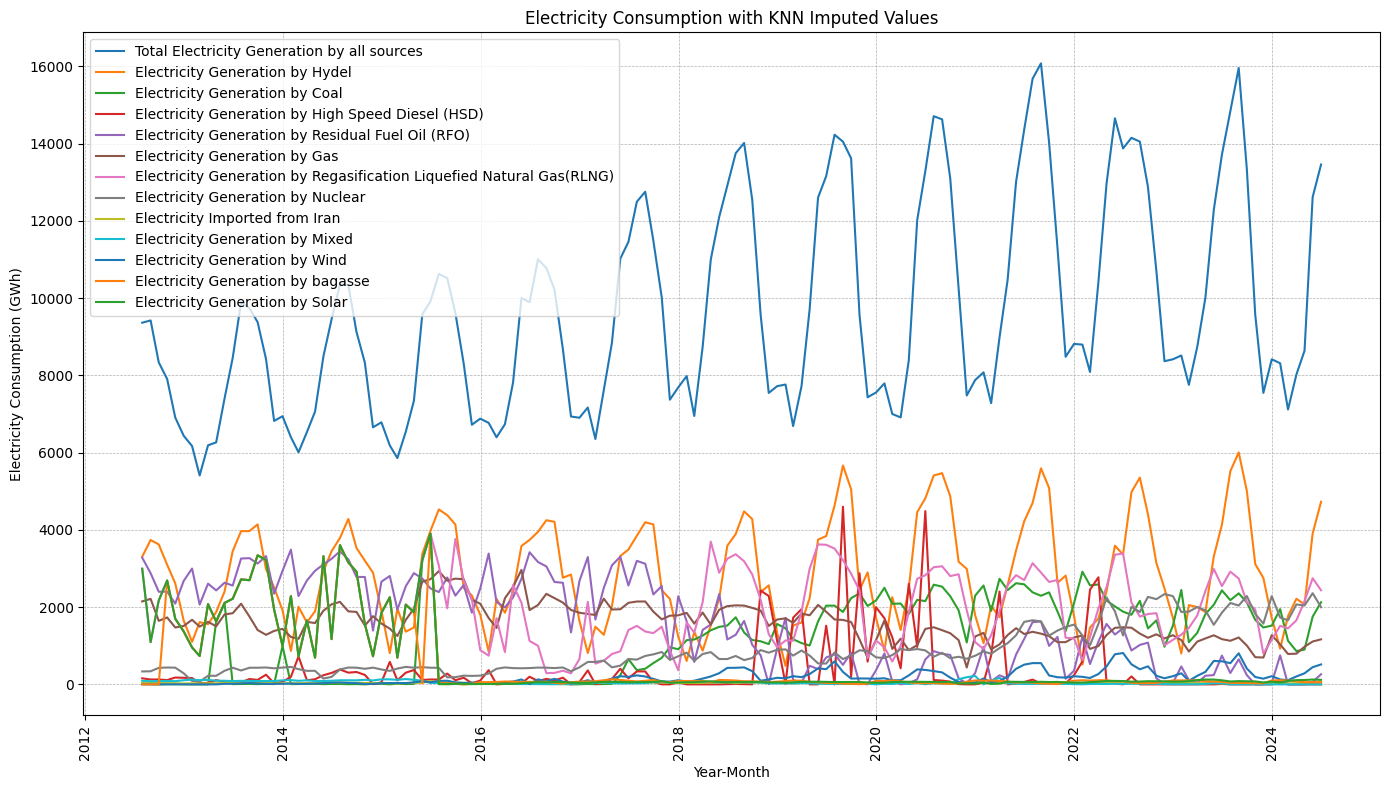

In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('dataset.csv')

# Convert 'Observation Date' to datetime and 'Observation Value' to numeric
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df['Observation Value'] = pd.to_numeric(df['Observation Value'], errors='coerce')

# Handle date format and prepare features for KNN Imputation
df['Year'] = df['Observation Date'].dt.year
df['Month'] = df['Observation Date'].dt.month

# Select relevant columns for imputation
data_for_imputation = df[['Year', 'Month', 'Observation Value']]

# Initialize KNN Imputer (using 5 nearest neighbors)
imputer = KNNImputer(n_neighbors=5)

# Perform KNN Imputation
imputed_data = imputer.fit_transform(data_for_imputation)

# Update the original DataFrame with imputed values
df['Observation Value'] = imputed_data[:, 2]

# Now plot the data, including imputed values
plt.figure(figsize=(14, 8))
for series in df['Series name'].unique():
    series_df = df[df['Series name'] == series].sort_values(by='Observation Date')
    plt.plot(series_df['Observation Date'], series_df['Observation Value'], label=series)

# Custom formatting for x-axis
plt.xticks(rotation=90)
plt.ylabel('Electricity Consumption (GWh)')
plt.xlabel('Year-Month')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Electricity Consumption with KNN Imputed Values')
plt.legend()
plt.tight_layout()
plt.show()


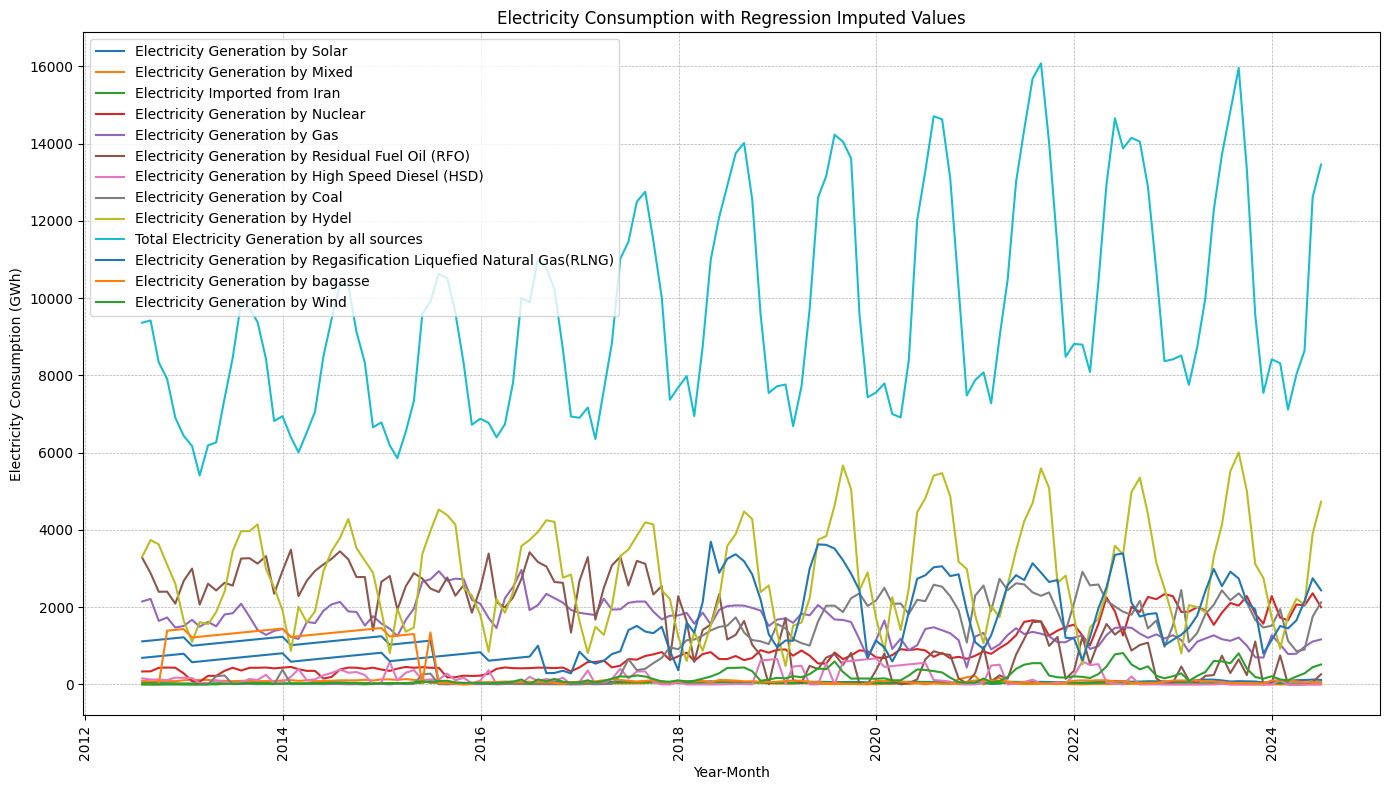

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv('dataset.csv')

# Convert 'Observation Date' to datetime and 'Observation Value' to numeric
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df['Observation Value'] = pd.to_numeric(df['Observation Value'], errors='coerce')

# Handle invalid values (e.g., negative values can be treated as invalid)
df.loc[df['Observation Value'] < 0, 'Observation Value'] = np.nan

# Handle date format and prepare features for regression imputation
df['Year'] = df['Observation Date'].dt.year
df['Month'] = df['Observation Date'].dt.month

# Separate valid and invalid rows
valid_rows = df.dropna(subset=['Observation Value']).copy()
invalid_rows = df[df['Observation Value'].isna()].copy()

# Check if there are invalid rows before attempting imputation
if len(invalid_rows) > 0:
    # Prepare features for regression
    valid_rows['Series Code'] = valid_rows['Series name'].astype('category').cat.codes
    invalid_rows['Series Code'] = invalid_rows['Series name'].astype('category').cat.codes

    # Prepare training data
    X_train = valid_rows[['Year', 'Month', 'Series Code']]
    y_train = valid_rows['Observation Value']

    # Train a Linear Regression model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Predict missing values using the regression model
    X_test = invalid_rows[['Year', 'Month', 'Series Code']]
    invalid_rows.loc[:, 'Observation Value'] = regressor.predict(X_test)

    # Combine valid and imputed rows
    df = pd.concat([valid_rows, invalid_rows]).sort_values(by='Observation Date')
else:
    print("No missing or invalid rows to impute.")

# Now plot the data with imputed values (if any)
plt.figure(figsize=(14, 8))
for series in df['Series name'].unique():
    series_df = df[df['Series name'] == series].sort_values(by='Observation Date')
    plt.plot(series_df['Observation Date'], series_df['Observation Value'], label=series)

# Custom formatting for x-axis
plt.xticks(rotation=90)
plt.ylabel('Electricity Consumption (GWh)')
plt.xlabel('Year-Month')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Electricity Consumption with Regression Imputed Values')
plt.legend()
plt.tight_layout()
plt.show()


**Individual gaphs showing every sector's electricity consumption**

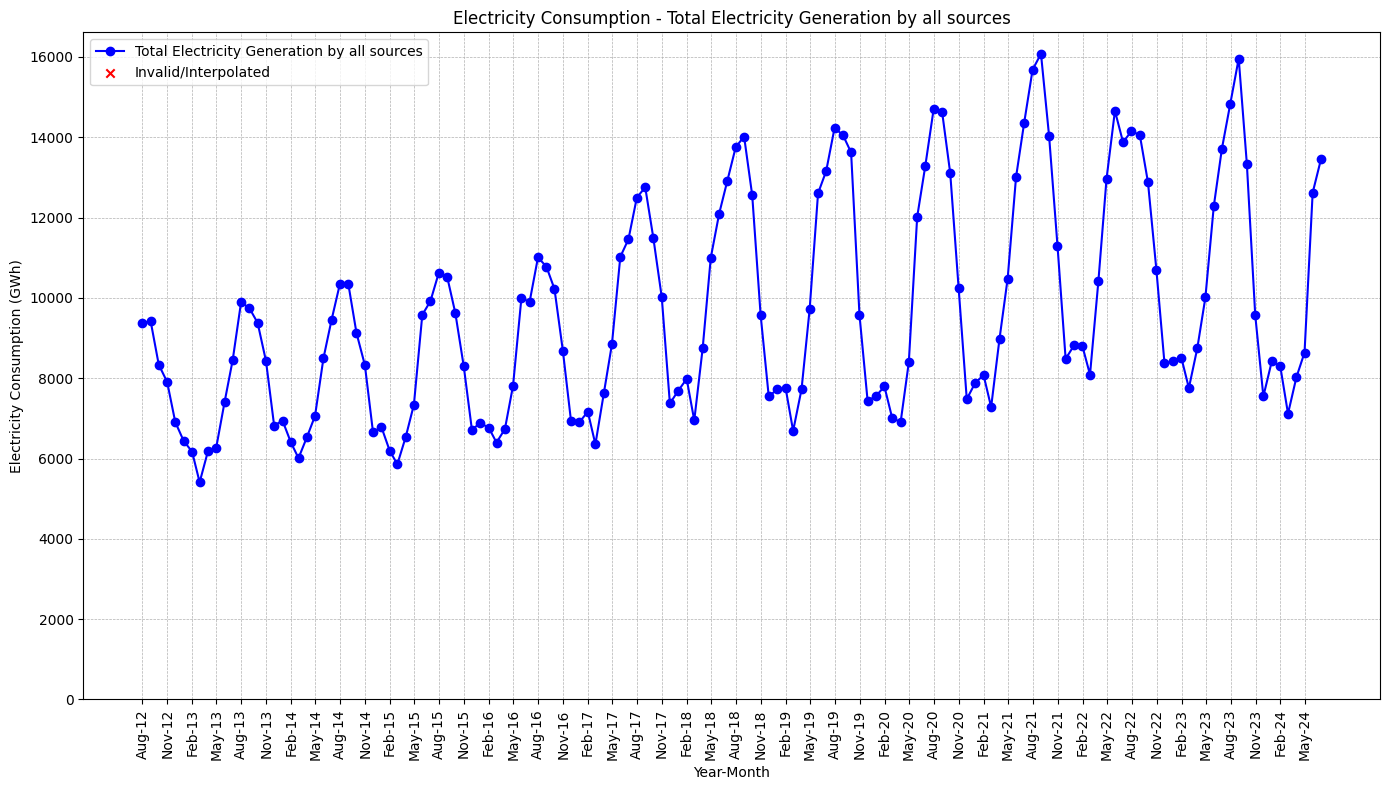

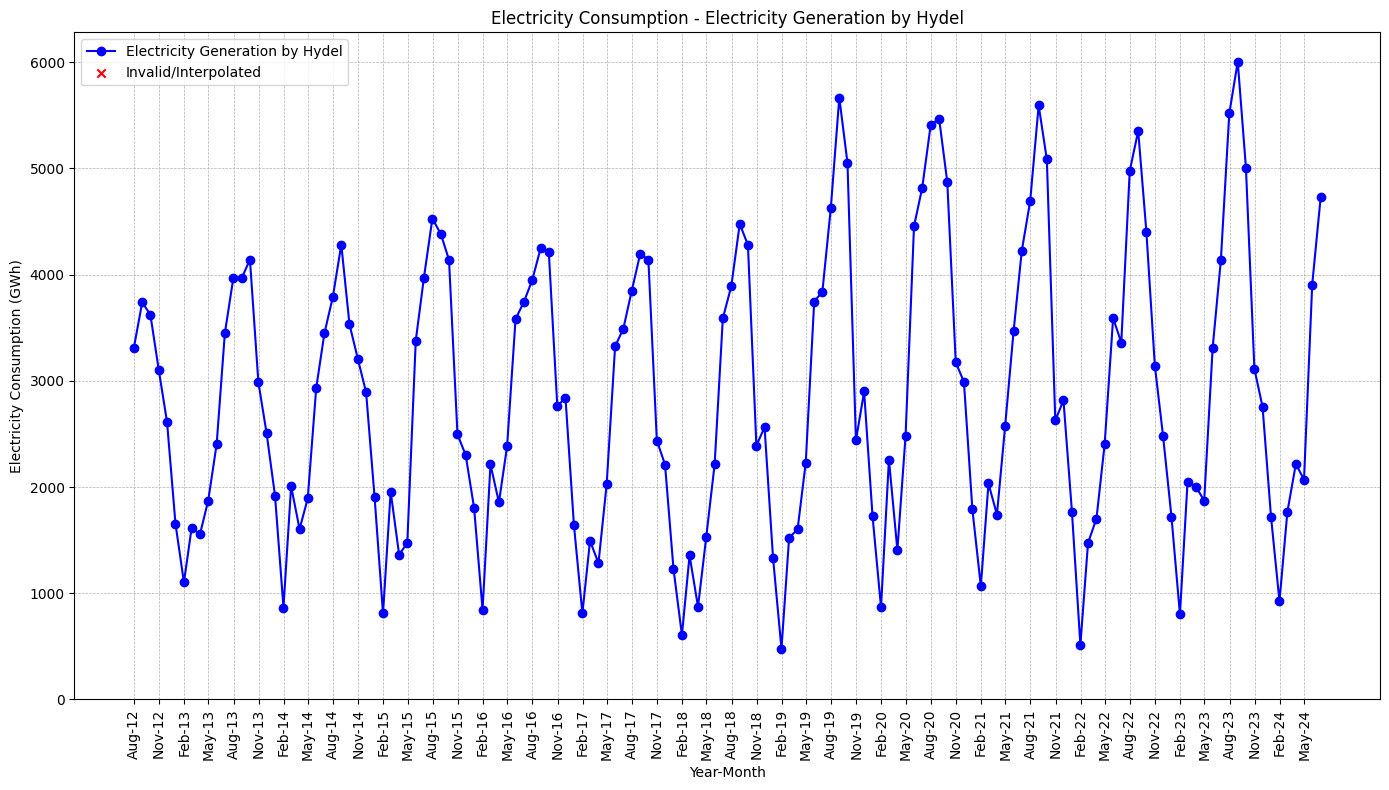

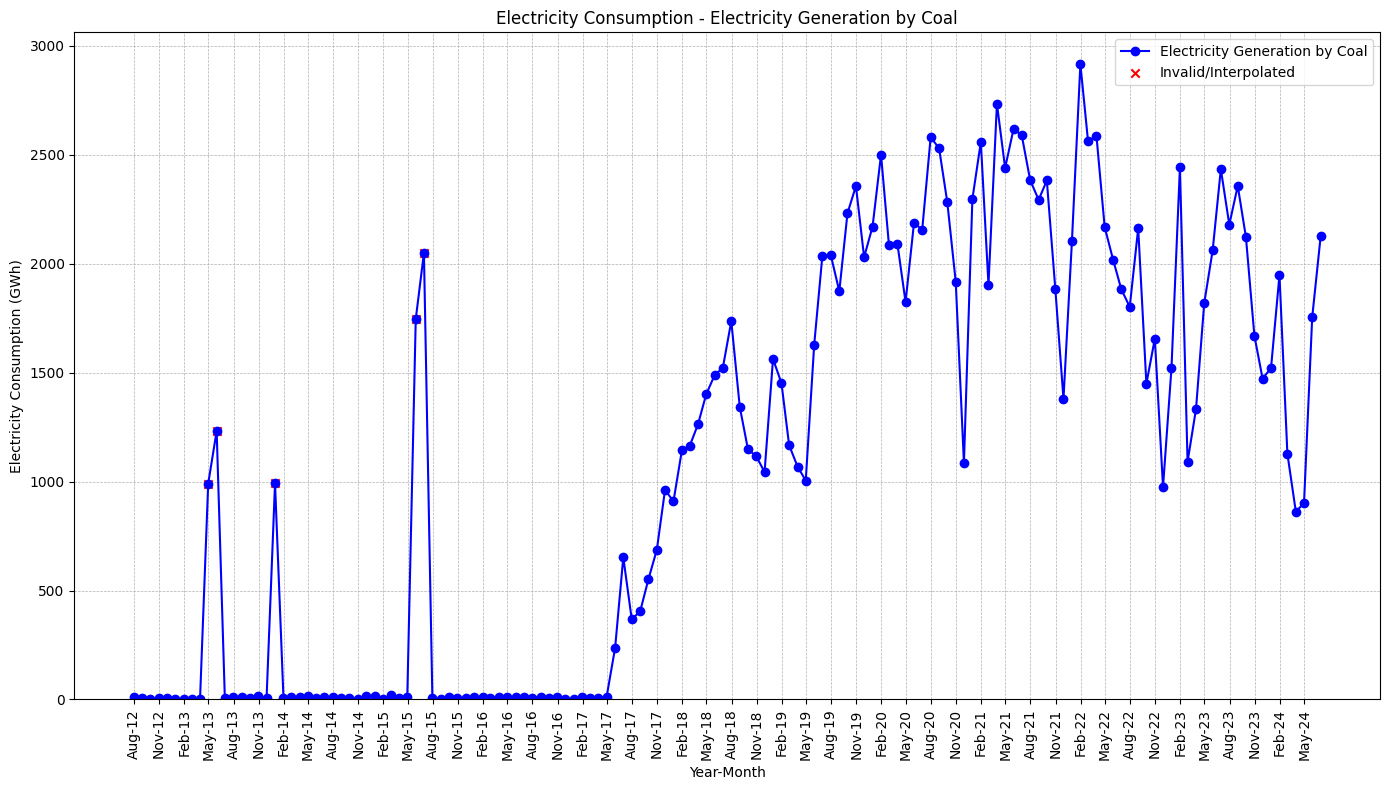

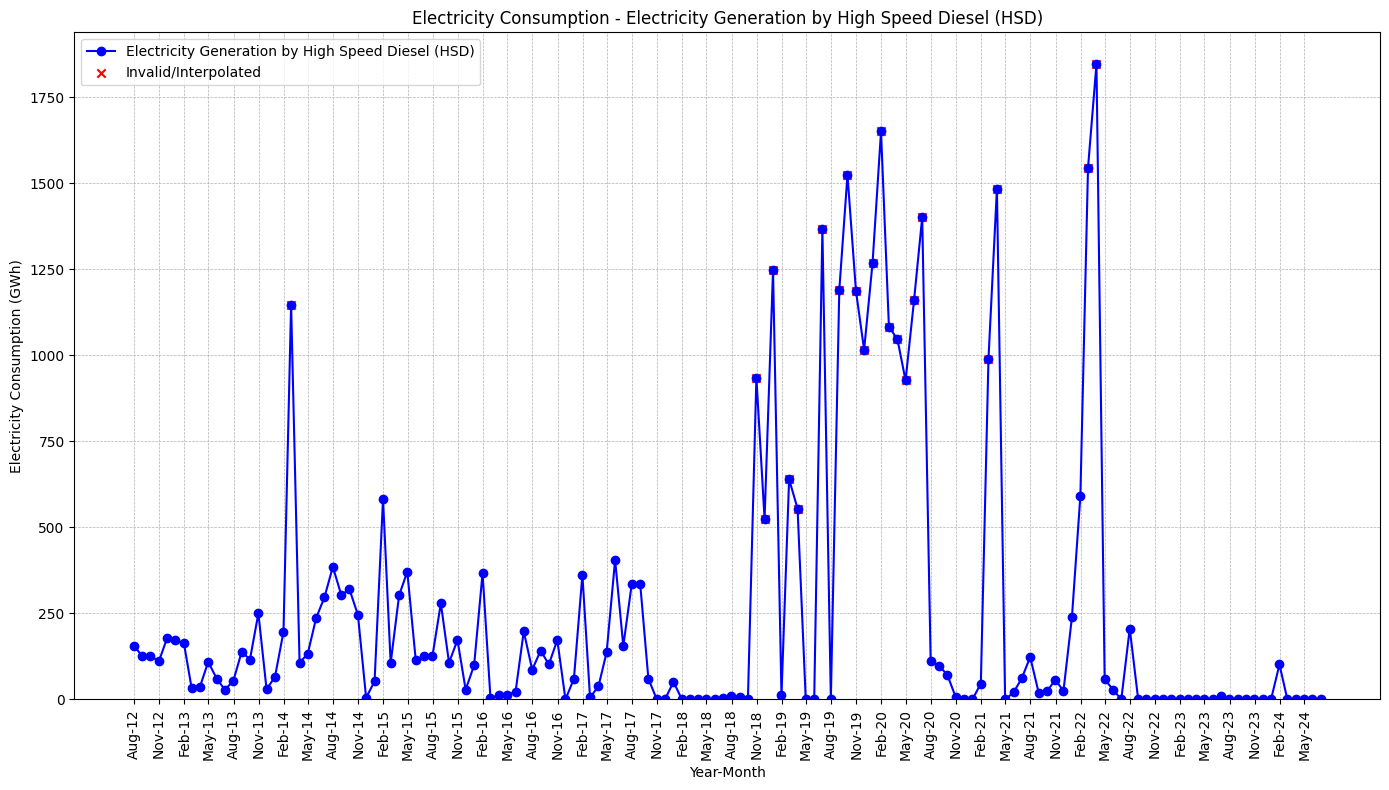

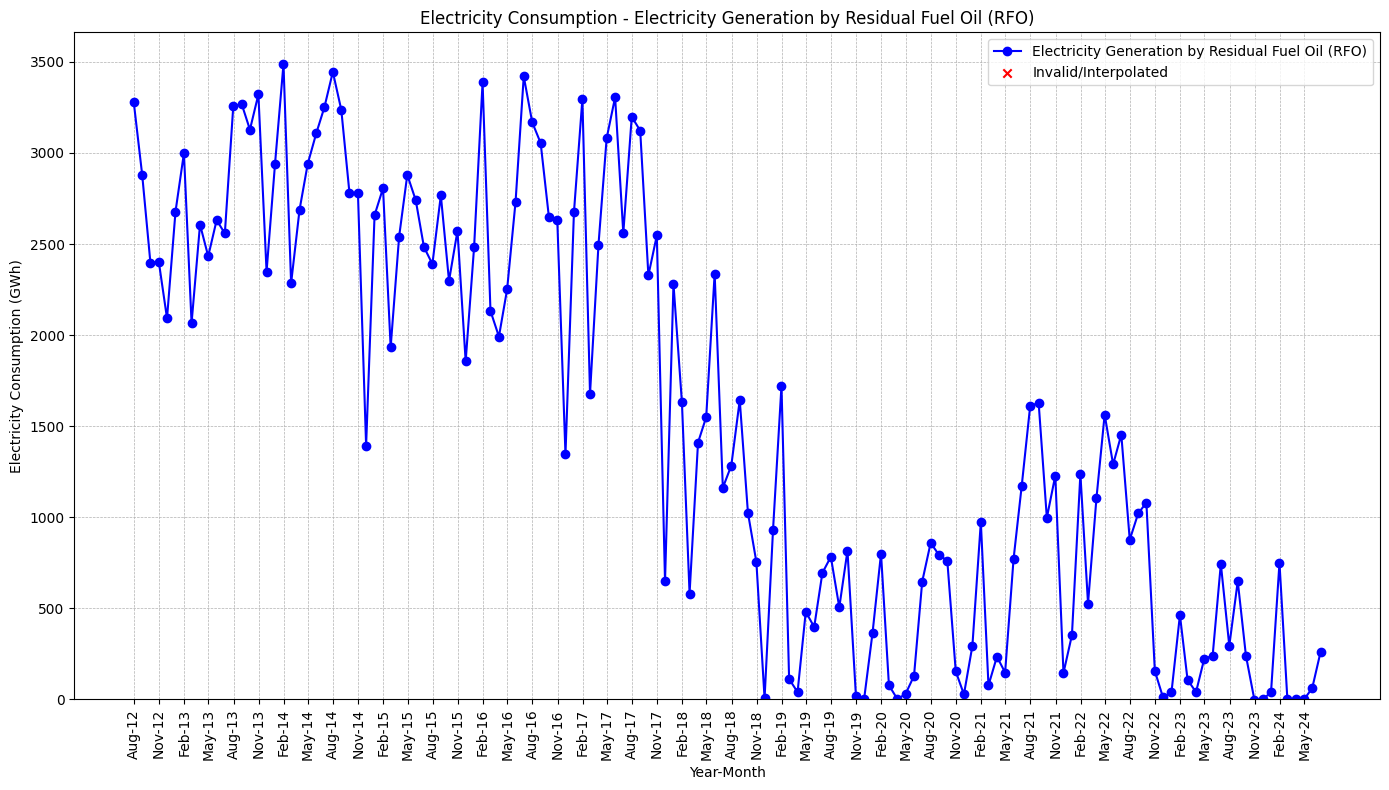

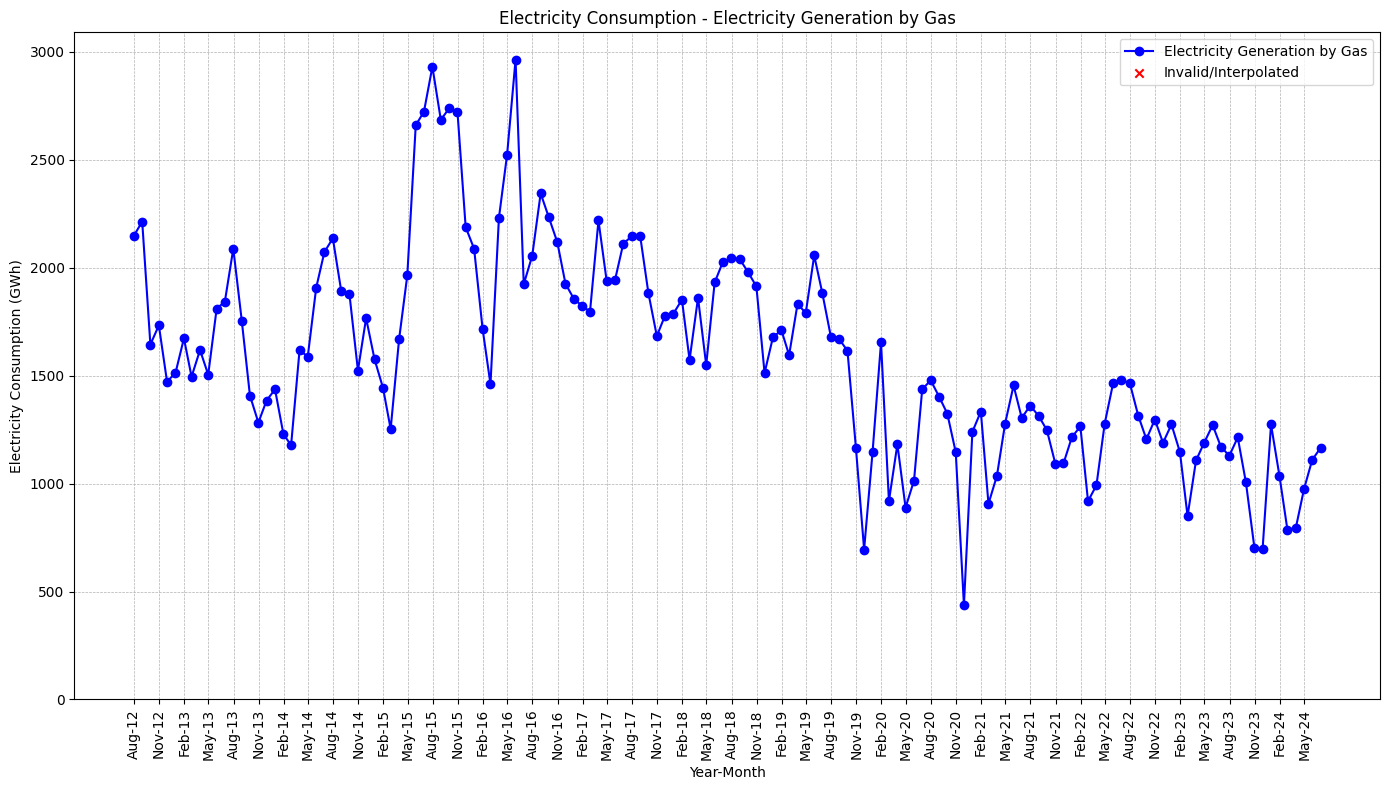

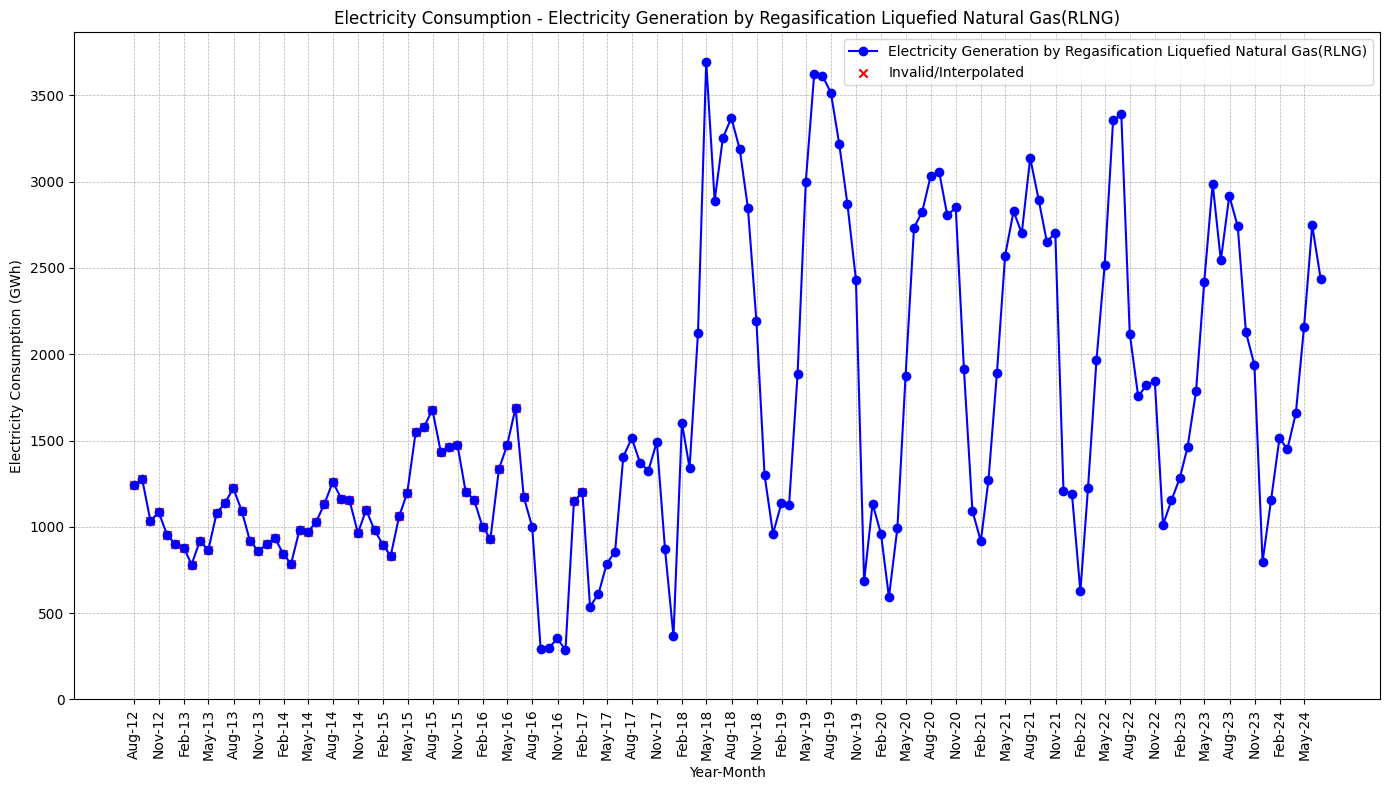

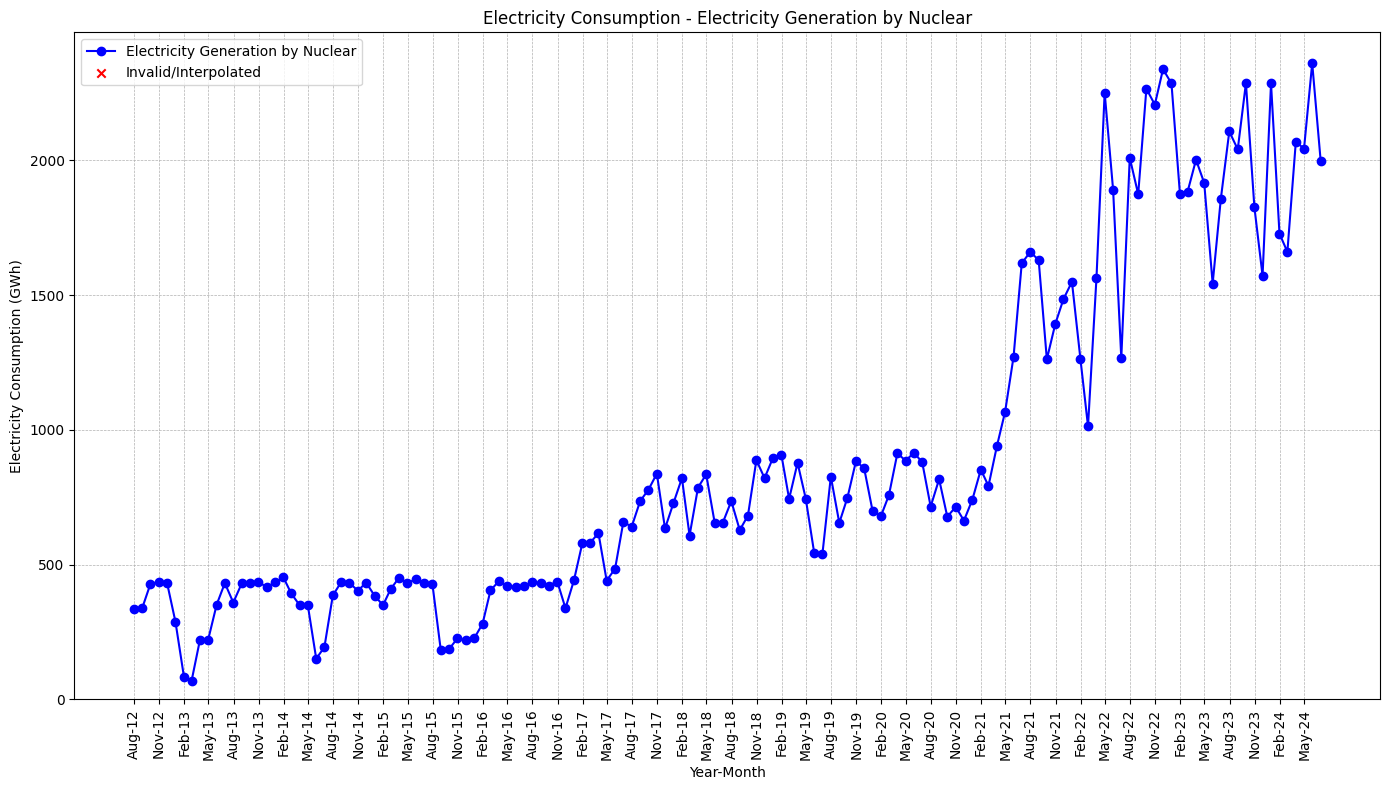

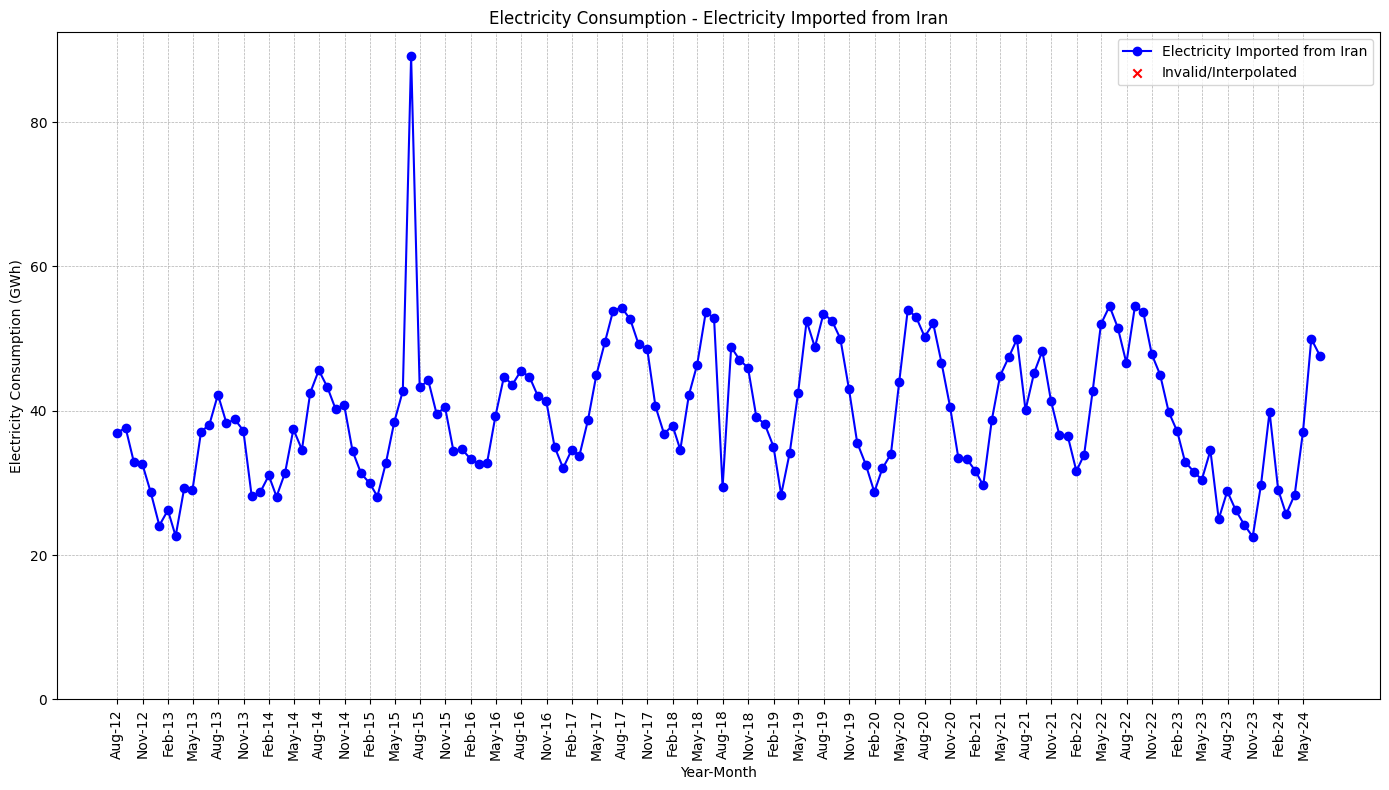

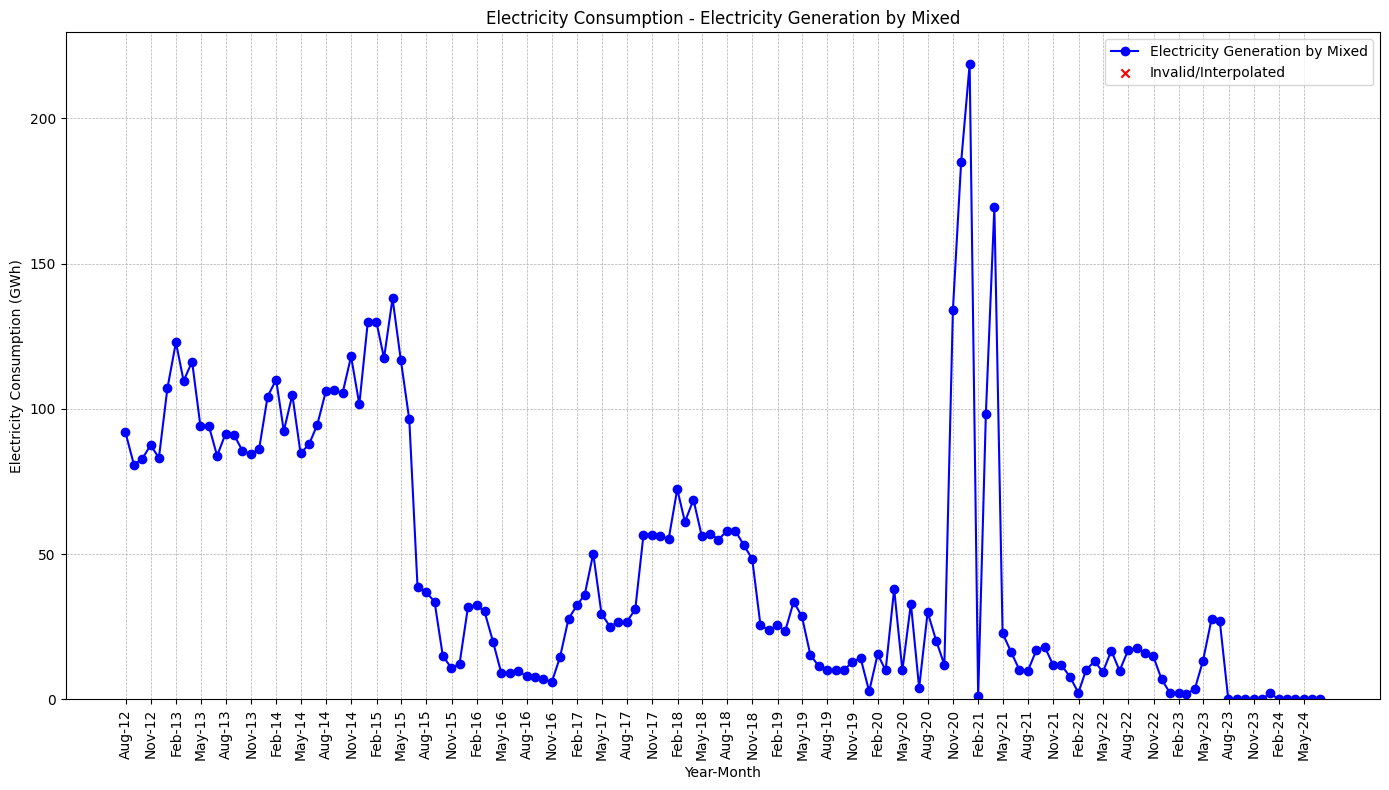

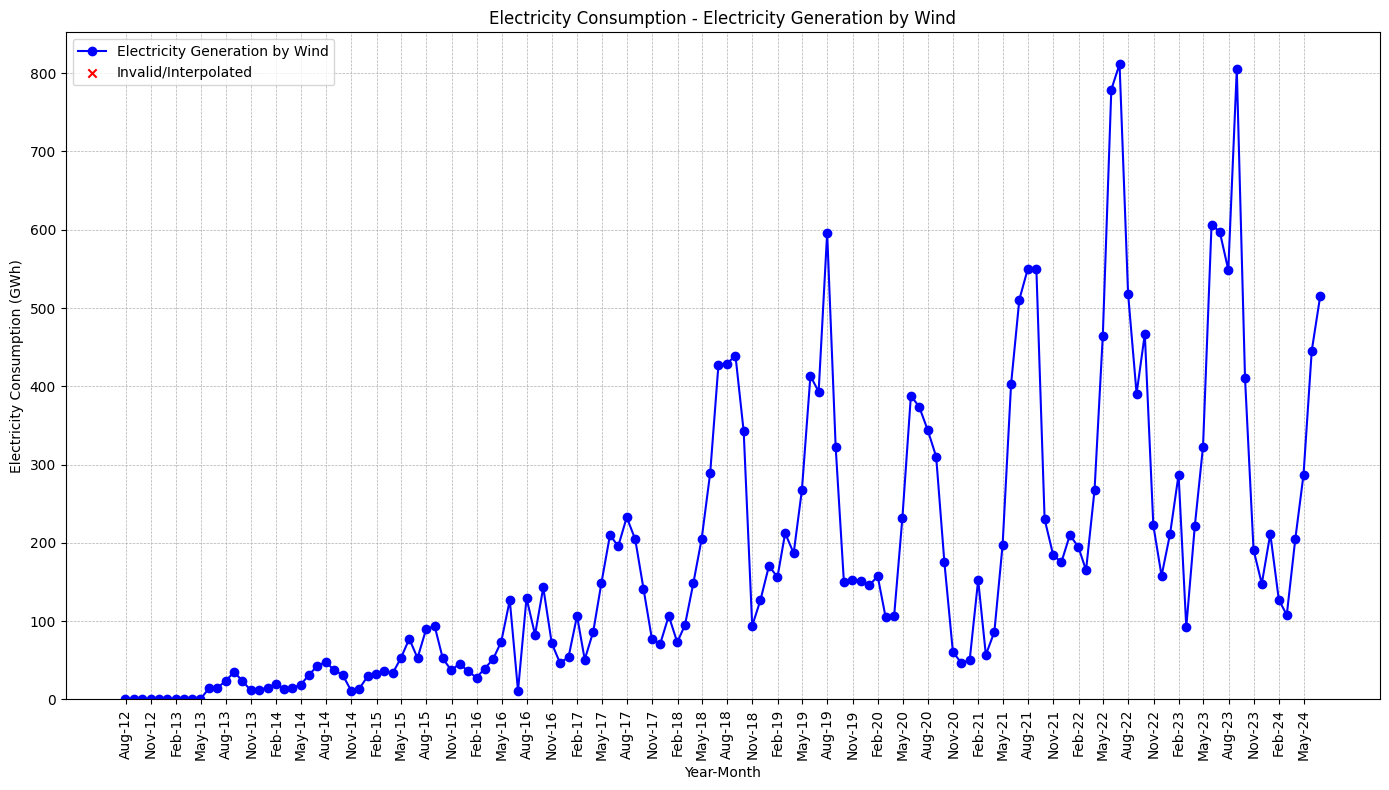

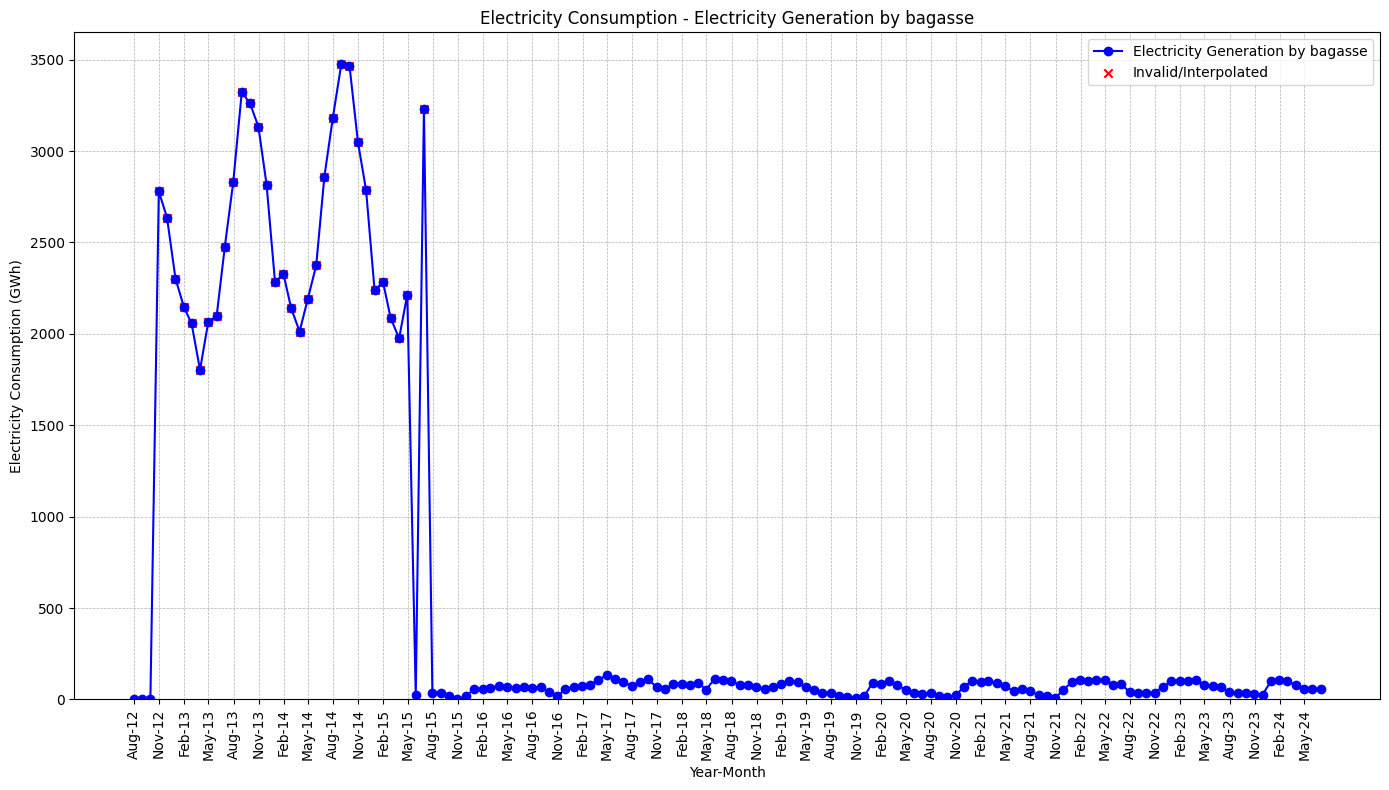

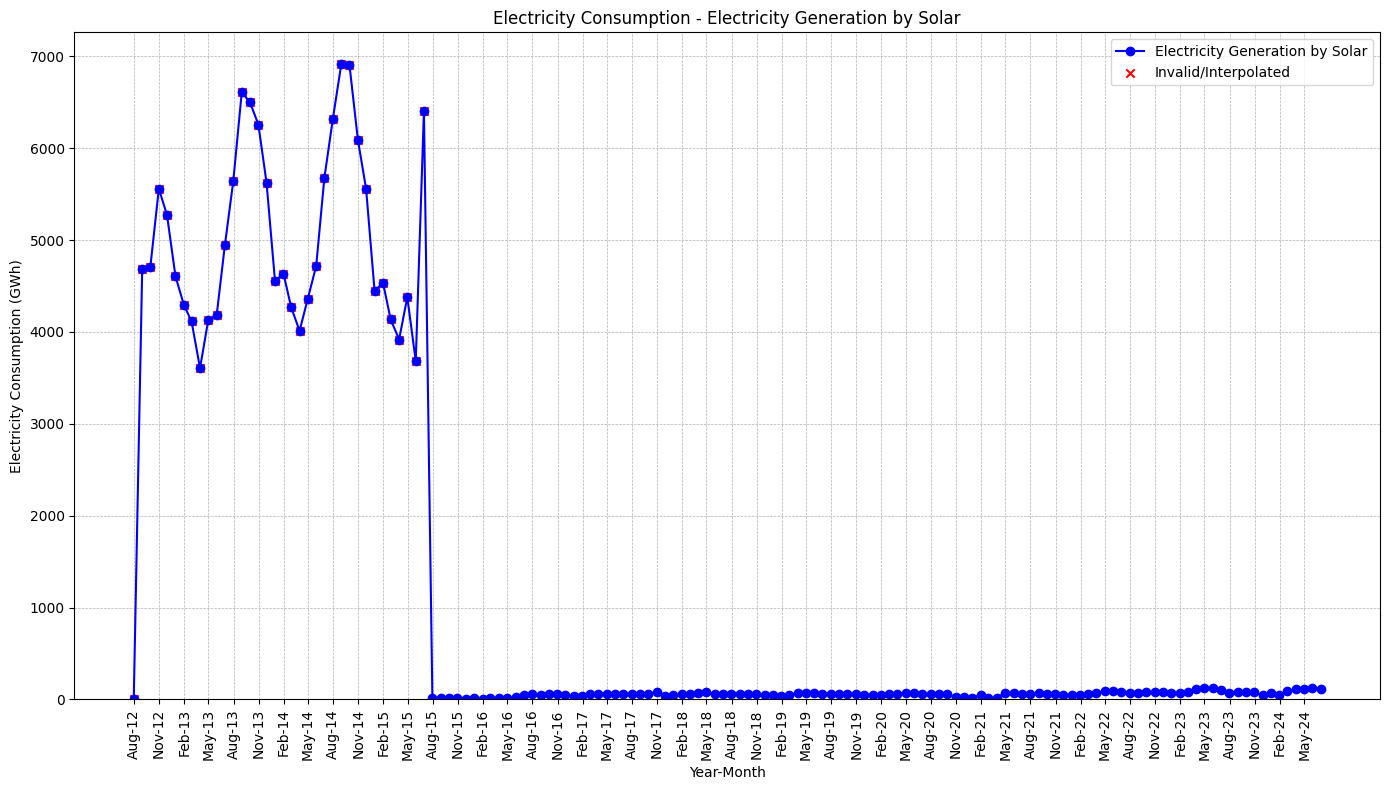

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
df = pd.read_csv('dataset.csv')

# Convert 'Observation Date' to datetime and 'Observation Value' to numeric
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df['Observation Value'] = pd.to_numeric(df['Observation Value'], errors='coerce')

# Identify invalid values (non-numeric or NaNs in 'Observation Value')
invalid_values = df['Observation Value'].isna()

# Handle invalid values: Fill with interpolated values
df['Observation Value'] = df['Observation Value'].interpolate(method='linear', limit_direction='both')

# Plot for each series name
series_names = df['Series name'].unique()

for series in series_names:
    plt.figure(figsize=(14, 8))

    # Filter data by series
    series_df = df[df['Series name'] == series]

    # Sort by 'Observation Date'
    series_df = series_df.sort_values(by='Observation Date')

    # Plot valid values
    plt.plot(series_df['Observation Date'], series_df['Observation Value'], label=series, marker='o', color='blue')

    # Plot invalid values with a different color and marker
    invalid_dates = series_df.loc[invalid_values, 'Observation Date']
    invalid_obs_values = series_df.loc[invalid_values, 'Observation Value']
    plt.scatter(invalid_dates, invalid_obs_values, color='red', label='Invalid/Interpolated', marker='x')

    # Set x-axis ticks to show every month
    all_months = pd.date_range(start=series_df['Observation Date'].min(), end=series_df['Observation Date'].max(), freq='MS')

    # Select every nth month for ticks (e.g., every 3 months)
    n = 3  # Change this value to adjust frequency of x-axis ticks
    plt.xticks(all_months[::n], [date.strftime('%b-%Y') if date.month == 1 else date.strftime('%b-%y') for date in all_months[::n]], rotation=90)

    # Simplify y-axis without custom formatting
    plt.ylabel('Electricity Consumption (GWh)')
    plt.xlabel('Year-Month')

    # Grid for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Ensure zeros and interpolated values are plotted
    plt.ylim(bottom=0)

    # Add a title and legend
    plt.title(f'Electricity Consumption - {series}')
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()


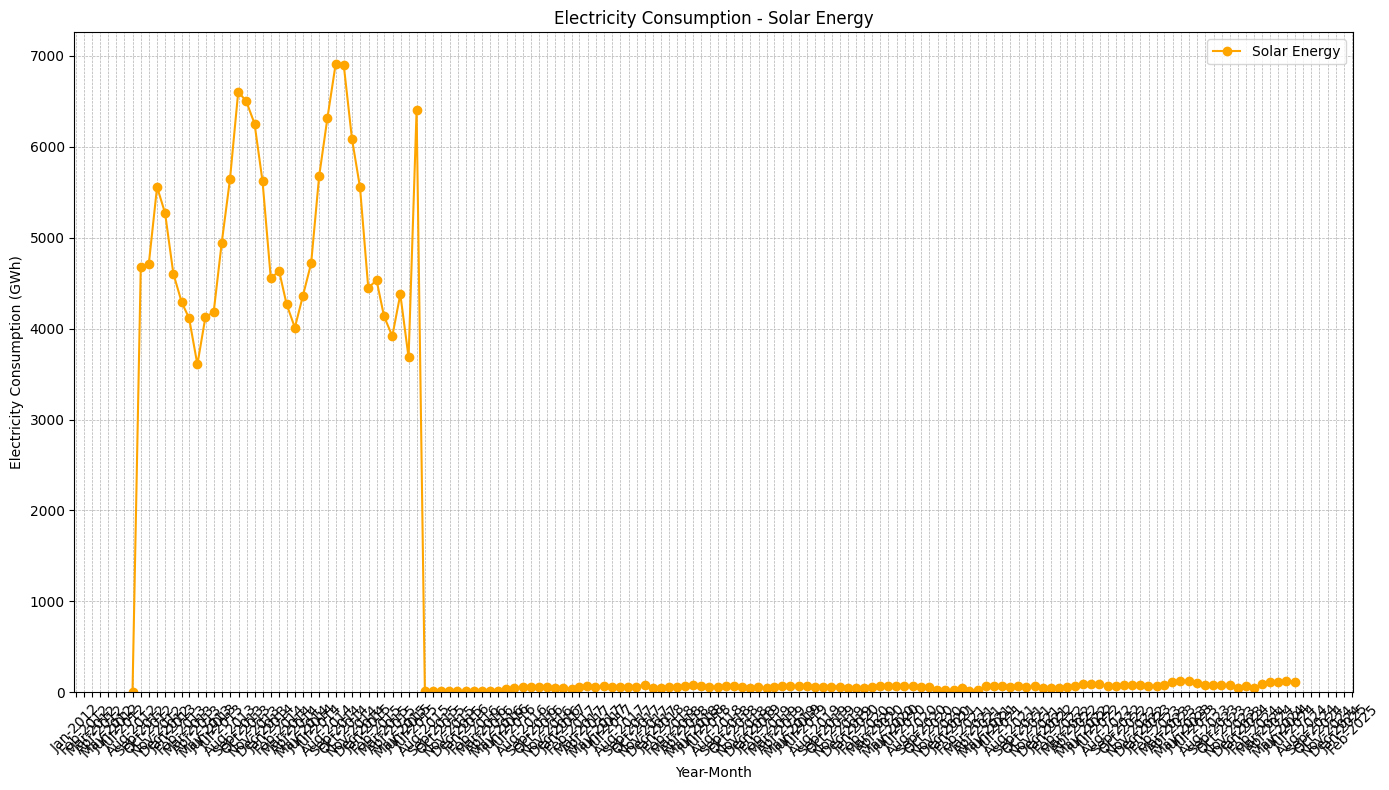

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
df = pd.read_csv('dataset.csv')

# Convert 'Observation Date' to datetime and 'Observation Value' to numeric
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df['Observation Value'] = pd.to_numeric(df['Observation Value'], errors='coerce')

# Fill invalid values (NaNs) with interpolated values
df['Observation Value'] = df['Observation Value'].interpolate(method='linear', limit_direction='both')

# Filter for solar energy data
solar_df = df[df['Series name'].str.contains('Solar', case=False, na=False)].copy()

# Check if solar_df contains any data
if solar_df.empty:
    print("No solar energy data found in the dataset.")
else:
    # Sort by 'Observation Date'
    solar_df = solar_df.sort_values(by='Observation Date')

    # Plotting
    plt.figure(figsize=(14, 8))

    # Plot valid values for solar energy
    plt.plot(solar_df['Observation Date'], solar_df['Observation Value'], label='Solar Energy', marker='o', color='orange')

    # Set the major locator and formatter for the x-axis
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Every month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

    # Rotate x-axis labels
    plt.xticks(rotation=45)

    # Set labels and grid
    plt.ylabel('Electricity Consumption (GWh)')
    plt.xlabel('Year-Month')
    plt.title('Electricity Consumption - Solar Energy')
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Ensure that the y-axis starts at 0
    plt.ylim(bottom=0)

    # Show legend
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.1670
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0641
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0781
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0544
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0555
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0616
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0505
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0560
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0592
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0540
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0568
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0520
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0541
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0522
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0467
Epoch 16/100
4/4 ━━

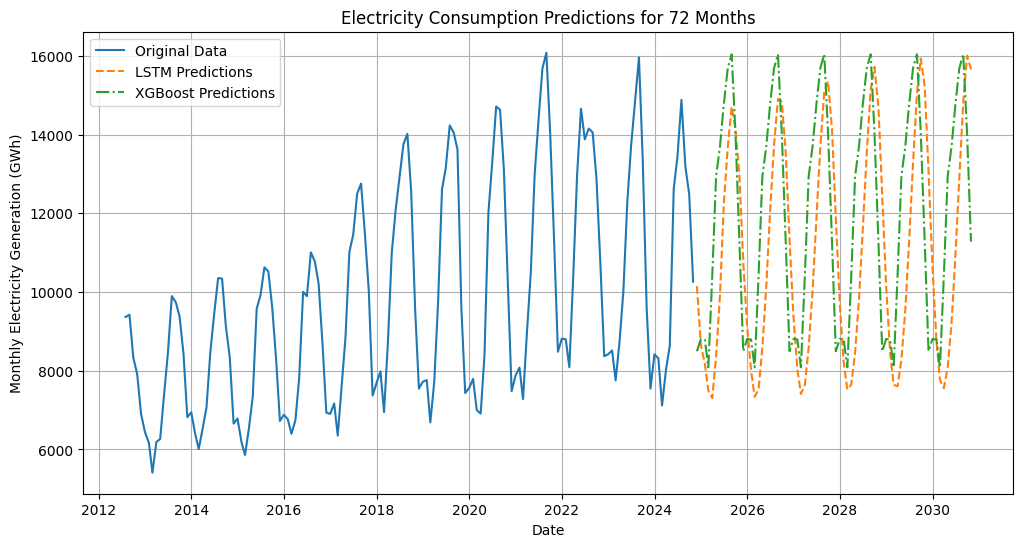

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime

# Load dataset
df = pd.read_csv('dataset.csv')

# Filter for 'Total Electricity Generation by all sources'
df = df[df['Sequence No.'] == 10].copy()

# Handle 'Observation Date' and 'Observation Value'
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df = df.dropna(subset=['Observation Date'])

# Sort dataset by date
df = df.sort_values(by='Observation Date')

# Scale 'Observation Value'
scaler = MinMaxScaler(feature_range=(0, 1))
df['Observation Value'] = scaler.fit_transform(df[['Observation Value']])

# Split data
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Extract necessary columns
train_values = train[['Observation Value']].values
test_values = test[['Observation Value']].values

# Set prediction months (72 months)
prediction_months = 72

# Preparing the data for LSTM
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

sequence_length = 12  # Using 12 months as sequence length
X_train, y_train = create_sequences(train_values, sequence_length)
X_test, y_test = create_sequences(test_values, sequence_length)

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, return_sequences=True, input_shape=(sequence_length, 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predict for the next 72 months with LSTM
lstm_preds = []
last_sequence = X_test[-1]  # Last sequence from the test set

for _ in range(prediction_months):
    next_pred = lstm_model.predict(last_sequence[np.newaxis, :, :])[0]
    lstm_preds.append(next_pred)
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

# Inverse transform the LSTM predictions
lstm_preds = scaler.inverse_transform(lstm_preds)

# XGBoost Model with additional features like year-to-year and month-to-month
df['Year'] = df['Observation Date'].dt.year
df['Month'] = df['Observation Date'].dt.month

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01)

# Create additional features: Year, Month
x_train_xgb = df[['Year', 'Month']][:train_size]
y_train_xgb = train_values.flatten()

# Train the XGBoost model
xgb_model.fit(x_train_xgb, y_train_xgb)

# Prepare the test set for XGBoost
x_test_xgb = df[['Year', 'Month']][train_size:]

# Predict for the next 72 months with XGBoost
future_dates = pd.date_range(df['Observation Date'].max(), periods=prediction_months+1, freq='ME')[1:]
future_years = future_dates.year
future_months = future_dates.month

future_xgb_features = np.column_stack([future_years, future_months])
xgb_preds = xgb_model.predict(future_xgb_features)
xgb_preds = scaler.inverse_transform(xgb_preds.reshape(-1, 1))

# Model Evaluation Metrics (R-squared, MSE, MAE)
lstm_mse = mean_squared_error(test_values[sequence_length:], lstm_model.predict(X_test))
lstm_mae = mean_absolute_error(test_values[sequence_length:], lstm_model.predict(X_test))
lstm_r2 = r2_score(test_values[sequence_length:], lstm_model.predict(X_test))

xgb_mse = mean_squared_error(test_values.flatten(), xgb_model.predict(x_test_xgb))
xgb_mae = mean_absolute_error(test_values.flatten(), xgb_model.predict(x_test_xgb))
xgb_r2 = r2_score(test_values.flatten(), xgb_model.predict(x_test_xgb))

print(f"LSTM Model Evaluation:\nMSE: {lstm_mse}\nMAE: {lstm_mae}\nR2: {lstm_r2}")
print(f"XGBoost Model Evaluation:\nMSE: {xgb_mse}\nMAE: {xgb_mae}\nR2: {xgb_r2}")

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df['Observation Date'], scaler.inverse_transform(df['Observation Value'].values.reshape(-1, 1)), label='Original Data')
plt.plot(future_dates, lstm_preds, label='LSTM Predictions', linestyle='dashed')
plt.plot(future_dates, xgb_preds, label='XGBoost Predictions', linestyle='dashdot')

# Formatting the plot
plt.title('Electricity Consumption Predictions for 72 Months')
plt.xlabel('Date')
plt.ylabel('Monthly Electricity Generation (GWh)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from keras import backend as K

# Clear the previous model
K.clear_session()


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, Input
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('dataset.csv')

# Filter for 'Total Electricity Generation by all sources'
df = df[df['Sequence No.'] == 10].copy()

# Handle 'Observation Date' and 'Observation Value'
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df = df.dropna(subset=['Observation Date'])

# Sort dataset by date
df = df.sort_values(by='Observation Date')

# Fill NaN values
df['Observation Value'] = df['Observation Value'].bfill()

# Add Year and Month features
df['Year'] = df['Observation Date'].dt.year
df['Month'] = df['Observation Date'].dt.month

# Scale 'Observation Value'
scaler = MinMaxScaler(feature_range=(0, 1))
df['Observation Value'] = scaler.fit_transform(df[['Observation Value']])

# Split data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

train_values = train[['Observation Value']].values
test_values = test[['Observation Value']].values

# XGBoost Model (simplified features with Year and Month)
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01)

# Prepare the XGBoost features
x_train_xgb = train[['Year', 'Month']]
y_train_xgb = train_values.flatten()

# Train XGBoost model
xgb_model.fit(x_train_xgb, y_train_xgb)

# Prepare the test set for XGBoost
x_test_xgb = test[['Year', 'Month']]

# Predict the next 72 months with XGBoost
prediction_months = 72
future_dates = pd.date_range(df['Observation Date'].max(), periods=prediction_months + 1, freq='ME')[1:]
future_years = future_dates.year
future_months = future_dates.month

future_xgb_features = np.column_stack([future_years, future_months])
xgb_preds = xgb_model.predict(future_xgb_features)
xgb_preds = scaler.inverse_transform(xgb_preds.reshape(-1, 1))

# LSTM Model Setup (Bidirectional LSTM)
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

sequence_length = 12  # Using 12 months as sequence length
X_train, y_train = create_sequences(train_values, sequence_length)
X_test, y_test = create_sequences(test_values, sequence_length)

# Build the Bidirectional LSTM model
lstm_model = Sequential()
lstm_model.add(Input(shape=(sequence_length, 1)))  # Define input shape
lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Bidirectional(LSTM(64, return_sequences=False)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predict the next 72 months with LSTM
lstm_preds = []
last_sequence = X_test[-1]  # Last sequence from the test set

for _ in range(prediction_months):
    next_pred = lstm_model.predict(last_sequence[np.newaxis, :, :])[0]
    lstm_preds.append(next_pred)
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

# Inverse transform the LSTM predictions
lstm_preds = scaler.inverse_transform(lstm_preds)

# Model Evaluation Metrics (R-squared, MSE, MAE)
lstm_mse = mean_squared_error(test_values[sequence_length:], lstm_model.predict(X_test))
lstm_mae = mean_absolute_error(test_values[sequence_length:], lstm_model.predict(X_test))
lstm_r2 = r2_score(test_values[sequence_length:], lstm_model.predict(X_test))

xgb_mse = mean_squared_error(test_values.flatten(), xgb_model.predict(x_test_xgb))
xgb_mae = mean_absolute_error(test_values.flatten(), xgb_model.predict(x_test_xgb))
xgb_r2 = r2_score(test_values.flatten(), xgb_model.predict(x_test_xgb))

print(f"Bidirectional LSTM Model Evaluation:\nMSE: {lstm_mse}\nMAE: {lstm_mae}\nR2: {lstm_r2}")
print(f"XGBoost Model Evaluation:\nMSE: {xgb_mse}\nMAE: {xgb_mae}\nR2: {xgb_r2}")

# Plotting the results
fig = go.Figure()

# Add Original Data
fig.add_trace(go.Scatter(x=df['Observation Date'],
                         y=scaler.inverse_transform(df['Observation Value'].values.reshape(-1, 1)).flatten(),
                         mode='lines+markers', name='Original Data'))

# Add LSTM Predictions
fig.add_trace(go.Scatter(x=future_dates, y=lstm_preds.flatten(),
                         mode='lines+markers', name='Bidirectional LSTM Predictions'))

# Add XGBoost Predictions
fig.add_trace(go.Scatter(x=future_dates, y=xgb_preds.flatten(),
                         mode='lines+markers', name='XGBoost Predictions'))

# Highlight highest and lowest in original data and predictions
highest_current_month = df.loc[df['Observation Value'].idxmax()]
highest_lstm_month = np.argmax(lstm_preds)
highest_xgb_month = np.argmax(xgb_preds)

# Plot highest consumption points
fig.add_trace(go.Scatter(x=[highest_current_month['Observation Date']],
                         y=[scaler.inverse_transform([[highest_current_month['Observation Value']]])[0][0]],
                         mode='markers', marker=dict(color='red', size=10), name='Highest Current'))

fig.add_trace(go.Scatter(x=[future_dates[highest_lstm_month]],
                         y=[lstm_preds[highest_lstm_month][0]],
                         mode='markers', marker=dict(color='blue', size=10), name='Highest LSTM Prediction'))

fig.add_trace(go.Scatter(x=[future_dates[highest_xgb_month]],
                         y=[xgb_preds[highest_xgb_month][0]],
                         mode='markers', marker=dict(color='green', size=10), name='Highest XGBoost Prediction'))

# Finalize plot
fig.update_layout(
    title='Electricity Consumption Predictions for 72 Months',
    xaxis_title='Date',
    yaxis_title='Monthly Electricity Generation (GWh)',
    legend_title='Legend'
)

fig.show()


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - loss: 0.1649
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0668
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0704
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0486
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0538
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0475
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0447
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0484
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0430
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0380
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0385
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0358
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0326
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0257
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0264
Epoch 16/100
4/4 ━

TEST FOR FRONTEND


In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, Input
# from xgboost import XGBRegressor # Commented out as only LSTM is needed for saving/conversion
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os # Added for file operations
from google.colab import files # Added for downloading files from Colab

# Load dataset
# Assuming 'dataset.csv' is uploaded to your Colab environment or accessible
try:
    df = pd.read_csv('dataset.csv')
except FileNotFoundError:
    print("Error: 'dataset.csv' not found. Please upload the file to your Colab session.")
    # Exit or handle the error appropriately
    exit()


# Filter for 'Total Electricity Generation by all sources'
df = df[df['Sequence No.'] == 10].copy()

# Handle 'Observation Date' and 'Observation Value'
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df = df.dropna(subset=['Observation Date'])

# Sort dataset by date
df = df.sort_values(by='Observation Date')

# Fill NaN values
df['Observation Value'] = df['Observation Value'].bfill()

# Add Year and Month features (though not directly used by LSTM sequence model)
df['Year'] = df['Observation Date'].dt.year
df['Month'] = df['Observation Date'].dt.month

# Scale 'Observation Value'
scaler = MinMaxScaler(feature_range=(0, 1))
df['Observation Value'] = scaler.fit_transform(df[['Observation Value']])

# Split data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

train_values = train[['Observation Value']].values
test_values = test[['Observation Value']].values # Keep test_values scaled (as per original logic)

# --- XGBoost Model Section Removed/Commented ---
# ... (XGBoost code omitted for clarity) ...
prediction_months = 72 # Define prediction_months earlier for use in date calculation

# --- LSTM Model Setup (Bidirectional LSTM) ---
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    # Ensure labels are returned with the correct shape for Keras (N, 1)
    return np.array(sequences), np.array(labels).reshape(-1, 1) # Reshape labels here

sequence_length = 12  # Using 12 months as sequence length
X_train, y_train = create_sequences(train_values, sequence_length)
X_test, y_test = create_sequences(test_values, sequence_length) # y_test remains scaled

# --- Build and Train the Bidirectional LSTM model ---
print("Building and Training BiLSTM model...")
lstm_model = Sequential(name="Bidirectional_LSTM_Electricity")
lstm_model.add(Input(shape=(sequence_length, 1)))
lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Bidirectional(LSTM(64, return_sequences=False)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
# Using validation_split during fit is generally good practice, keeping it:
history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)
print("BiLSTM model training complete.")
lstm_model.summary()

# --- Predict the next 72 months with LSTM (using ORIGINAL logic) ---
print(f"Predicting next {prediction_months} months with BiLSTM (Original Logic)...")
lstm_preds_scaled = [] # Store scaled predictions first
# Use the last sequence from the *test* set as per original code
if len(X_test) > 0:
    last_sequence = X_test[-1].copy() # Use .copy() to avoid modifying X_test directly
else:
    # Fallback if test set is too small for a sequence
    last_sequence = X_train[-1].copy()
    print("Warning: Test set too small for sequence, using last training sequence for prediction start.")


for _ in range(prediction_months):
    # Reshape the sequence for prediction (add batch dimension)
    next_pred_scaled = lstm_model.predict(last_sequence[np.newaxis, :, :])[0]
    lstm_preds_scaled.append(next_pred_scaled)

    # Update the sequence for the next prediction (Original roll and replace logic)
    # Roll the sequence (shift elements left)
    last_sequence = np.roll(last_sequence, -1, axis=0)
    # Replace the last element with the new prediction
    last_sequence[-1] = next_pred_scaled

# Inverse transform the LSTM predictions *after* the loop
lstm_preds = scaler.inverse_transform(np.array(lstm_preds_scaled))
print("BiLSTM future predictions generated and scaled back.")


# --- Model Evaluation Metrics (Using ORIGINAL logic - calculated on SCALED data) ---
print("\nEvaluating BiLSTM model (Original Logic - on Scaled Test Data)...")
# Predict on the actual test sequences (output is scaled)
y_pred_scaled_test = lstm_model.predict(X_test)

# Calculate metrics using scaled true values (y_test) and scaled predictions (y_pred_scaled_test)
# Ensure y_test has the same shape as y_pred_scaled_test if necessary
# y_test should already be (N, 1) from create_sequences
lstm_mse = mean_squared_error(y_test, y_pred_scaled_test)
lstm_mae = mean_absolute_error(y_test, y_pred_scaled_test)
lstm_r2 = r2_score(y_test, y_pred_scaled_test)

print(f"Bidirectional LSTM Model Evaluation:") # Matches original output format
print(f"MSE: {lstm_mse}")
print(f"MAE: {lstm_mae}")
print(f"R2: {lstm_r2}\n")


# --- XGBoost Model Evaluation Removed ---
# ...

# ==============================================================================
# === NEW SECTION: Save BiLSTM Model, Convert to TF.js, and Download ===
# ==============================================================================
# (This section remains unchanged from the previous version)

# 1. Save the trained Keras model in H5 format
h5_model_path = 'bilstm_electricity_model.h5'
print(f"Saving BiLSTM model to {h5_model_path}...")
lstm_model.save(h5_model_path)
print("Model saved successfully.")

# 2. Install tensorflowjs (if not already installed in the Colab environment)
print("\nInstalling tensorflowjs library...")
!pip install -q tensorflowjs
print("tensorflowjs installed.")

# 3. Convert the Keras H5 model to TensorFlow.js format
tfjs_output_dir = 'tfjs_model' # Directory to store the converted files
print(f"\nConverting {h5_model_path} to TensorFlow.js format in directory '{tfjs_output_dir}'...")
os.makedirs(tfjs_output_dir, exist_ok=True)
!tensorflowjs_converter --input_format keras {h5_model_path} {tfjs_output_dir}
print(f"Conversion complete. TensorFlow.js files should be in '{tfjs_output_dir}'.")
print("Files generated:")
for f in os.listdir(tfjs_output_dir):
  print(f"- {f}")

# 4. Download the converted TensorFlow.js files from Colab to your local PC
print(f"\nPreparing to download files from '{tfjs_output_dir}'...")
print("Your browser should prompt you to save each file. Check for pop-up blockers if download doesn't start.")
for filename in os.listdir(tfjs_output_dir):
    file_path = os.path.join(tfjs_output_dir, filename)
    if os.path.isfile(file_path):
        print(f"Downloading {filename}...")
        files.download(file_path)
print("\nDownload process initiated for all files in the tfjs_model directory.")

# ==============================================================================
# === End of NEW SECTION ===
# ==============================================================================


# --- Plotting the results (Reverted to closely match Original Intent) ---
print("\nPlotting results...")
fig = go.Figure()

# Determine future dates based on the *last date in the original dataframe*
future_dates = pd.date_range(df['Observation Date'].iloc[-1], periods=prediction_months + 1, freq='ME')[1:]


# Add Original Data (Unscaled)
fig.add_trace(go.Scatter(x=df['Observation Date'],
                         y=scaler.inverse_transform(df['Observation Value'].values.reshape(-1, 1)).flatten(),
                         mode='lines', name='Original Data'))

# Add Future LSTM Predictions (Unscaled)
fig.add_trace(go.Scatter(x=future_dates, y=lstm_preds.flatten(),
                         mode='lines+markers', name='Bidirectional LSTM Predictions', # Renamed for clarity
                         line=dict(color='red'))) # Changed color for distinction

# --- XGBoost Predictions Plotting Removed ---
# ...

# --- Highlighting points (Using original logic structure, adapted) ---
# Find highest in original data (unscaled)
highest_current_idx = df['Observation Value'].idxmax() # This uses scaled value index, but we plot unscaled
highest_current_val_unscaled = scaler.inverse_transform([[df['Observation Value'].max()]])[0][0]
highest_current_date = df.loc[highest_current_idx, 'Observation Date']

# Find highest in future LSTM predictions (unscaled)
if len(lstm_preds) > 0:
    highest_lstm_pred_idx = np.argmax(lstm_preds)
    highest_lstm_pred_val = lstm_preds[highest_lstm_pred_idx][0]
    highest_lstm_pred_date = future_dates[highest_lstm_pred_idx]

    # Plot highest consumption points
    fig.add_trace(go.Scatter(x=[highest_current_date],
                             y=[highest_current_val_unscaled],
                             mode='markers', marker=dict(color='blue', size=10, symbol='star'), name='Highest Historical'))

    fig.add_trace(go.Scatter(x=[highest_lstm_pred_date],
                             y=[highest_lstm_pred_val],
                             mode='markers', marker=dict(color='red', size=10, symbol='star'), name='Highest LSTM Prediction'))
else:
    print("No future predictions to plot highest point for.")

# --- XGBoost highest point removed ---
# ...


# Finalize plot
fig.update_layout(
    title='Electricity Generation: Historical Data & BiLSTM Future Predictions', # Updated title
    xaxis_title='Date',
    yaxis_title='Monthly Electricity Generation (GWh)',
    legend_title='Legend'
)

fig.show()
print("\nScript execution finished.")

Building and Training BiLSTM model...
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - loss: 0.1604 - val_loss: 0.0816
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0578 - val_loss: 0.1036
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0669 - val_loss: 0.0715
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0509 - val_loss: 0.0683
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0455 - val_loss: 0.0709
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0456 - val_loss: 0.0660
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0459 - val_loss: 0.0631
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0424 - val_loss: 0.0612
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0472 - val_loss: 0.0627
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0392 - val_loss: 0.0560
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0436 - val_loss: 0.0583
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━

Model: "Bidirectional_LSTM_Electricity"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional) │ (None, 12, 128)        │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 398,213 (1.52 MB)

 Trainable params: 132,737 (518.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 265,476 (1.01 MB)

Predicting next 72 months with BiLSTM (Original Logic)...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5

Bidirectional LSTM Model Evaluation:
MSE: 0.007775012006380435
MAE: 0.06898624264029979
R2: 0.8938474401619412

Saving BiLSTM model to bilstm_electricity_model.h5...
Model saved successfully.

Installing tensorflowjs library...
tensorflowjs installed.

Converting bilstm_electricity_model.h5 to TensorFlow.js format in directory 'tfjs_model'...
2025-05-03 19:34:41.857749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746300881.886597    8802 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746300881.894799    8802 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more fea

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Download process initiated for all files in the tfjs_model directory.

Plotting results...



Script execution finished.


PREVIOUS ONE

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, Input
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('dataset.csv')

# Filter for 'Total Electricity Generation by all sources'
df = df[df['Sequence No.'] == 10].copy()

# Handle 'Observation Date' and 'Observation Value'
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df = df.dropna(subset=['Observation Date'])

# Sort dataset by date
df = df.sort_values(by='Observation Date')

# Fill NaN values
df['Observation Value'] = df['Observation Value'].bfill()

# Add Year and Month features
df['Year'] = df['Observation Date'].dt.year
df['Month'] = df['Observation Date'].dt.month

# Scale 'Observation Value'
scaler = MinMaxScaler(feature_range=(0, 1))
df['Observation Value'] = scaler.fit_transform(df[['Observation Value']])

# Add Annual Trends (Cumulative Annual Growth Rate)
annual_trend = df.groupby('Year')['Observation Value'].mean().pct_change().fillna(0).cumsum()
df['Annual Trend'] = df['Year'].map(annual_trend)

# Split data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

train_values = train[['Observation Value']].values
test_values = test[['Observation Value']].values

# XGBoost Model (simplified features with Year, Month, and Annual Trend)
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.01)

# Prepare the XGBoost features
x_train_xgb = train[['Year', 'Month', 'Annual Trend']]
y_train_xgb = train_values.flatten()

# Train XGBoost model
xgb_model.fit(x_train_xgb, y_train_xgb)

# Prepare the test set for XGBoost
x_test_xgb = test[['Year', 'Month', 'Annual Trend']]

# Predict the next 72 months with XGBoost
prediction_months = 72
future_dates = pd.date_range(df['Observation Date'].max(), periods=prediction_months + 1, freq='ME')[1:]
future_years = future_dates.year
future_months = future_dates.month
future_annual_trends = [annual_trend.iloc[-1]] * prediction_months

future_xgb_features = np.column_stack([future_years, future_months, future_annual_trends])
xgb_preds = xgb_model.predict(future_xgb_features)
xgb_preds = scaler.inverse_transform(xgb_preds.reshape(-1, 1))

# LSTM Model Setup (Bidirectional LSTM)
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

sequence_length = 12  # Using 12 months as sequence length
X_train, y_train = create_sequences(train_values, sequence_length)
X_test, y_test = create_sequences(test_values, sequence_length)

# Build the Bidirectional LSTM model
lstm_model = Sequential()
lstm_model.add(Input(shape=(sequence_length, 1)))  # Define input shape
lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Bidirectional(LSTM(64, return_sequences=False)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predict the next 72 months with LSTM
lstm_preds = []
last_sequence = X_test[-1]  # Last sequence from the test set

for _ in range(prediction_months):
    next_pred = lstm_model.predict(last_sequence[np.newaxis, :, :])[0]
    lstm_preds.append(next_pred)
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

# Inverse transform the LSTM predictions
lstm_preds = scaler.inverse_transform(lstm_preds)

# Model Evaluation Metrics (R-squared, MSE, MAE)
lstm_mse = mean_squared_error(test_values[sequence_length:], lstm_model.predict(X_test))
lstm_mae = mean_absolute_error(test_values[sequence_length:], lstm_model.predict(X_test))
lstm_r2 = r2_score(test_values[sequence_length:], lstm_model.predict(X_test))

xgb_mse = mean_squared_error(test_values.flatten(), xgb_model.predict(x_test_xgb))
xgb_mae = mean_absolute_error(test_values.flatten(), xgb_model.predict(x_test_xgb))
xgb_r2 = r2_score(test_values.flatten(), xgb_model.predict(x_test_xgb))

print(f"LSTM Model Evaluation:\nMSE: {lstm_mse}\nMAE: {lstm_mae}\nR2: {lstm_r2}")
print(f"XGBoost Model Evaluation:\nMSE: {xgb_mse}\nMAE: {xgb_mae}\nR2: {xgb_r2}")

# Plotting the results
fig = go.Figure()

# Add Original Data
fig.add_trace(go.Scatter(x=df['Observation Date'],
                         y=scaler.inverse_transform(df['Observation Value'].values.reshape(-1, 1)).flatten(),
                         mode='lines+markers', name='Original Data'))

# Add LSTM Predictions
fig.add_trace(go.Scatter(x=future_dates, y=lstm_preds.flatten(),
                         mode='lines+markers', name='Bidirectional LSTM Predictions'))

# Add XGBoost Predictions
fig.add_trace(go.Scatter(x=future_dates, y=xgb_preds.flatten(),
                         mode='lines+markers', name='XGBoost Predictions'))

# Highlight High and Low Months for Historical Data
for year, group in df.groupby('Year'):
    high_month = group.loc[group['Observation Value'].idxmax()]
    low_month = group.loc[group['Observation Value'].idxmin()]
    fig.add_trace(go.Scatter(x=[high_month['Observation Date']],
                             y=[scaler.inverse_transform([[high_month['Observation Value']]])[0][0]],
                             mode='markers', marker=dict(color='white', size=10), name=f'High {year}'))
    fig.add_trace(go.Scatter(x=[low_month['Observation Date']],
                             y=[scaler.inverse_transform([[low_month['Observation Value']]])[0][0]],
                             mode='markers', marker=dict(color='black', size=10), name=f'Low {year}'))

# Highlight High and Low Months for LSTM and XGBoost
high_lstm = np.argmax(lstm_preds)
low_lstm = np.argmin(lstm_preds)
high_xgb = np.argmax(xgb_preds)
low_xgb = np.argmin(xgb_preds)

fig.add_trace(go.Scatter(x=[future_dates[high_lstm]], y=[lstm_preds[high_lstm][0]],
                         mode='markers', marker=dict(color='blue', size=10), name='LSTM High'))
fig.add_trace(go.Scatter(x=[future_dates[low_lstm]], y=[lstm_preds[low_lstm][0]],
                         mode='markers', marker=dict(color='blue', size=10), name='LSTM Low'))

fig.add_trace(go.Scatter(x=[future_dates[high_xgb]], y=[xgb_preds[high_xgb][0]],
                         mode='markers', marker=dict(color='green', size=10), name='XGBoost High'))
fig.add_trace(go.Scatter(x=[future_dates[low_xgb]], y=[xgb_preds[low_xgb][0]],
                         mode='markers', marker=dict(color='green', size=10), name='XGBoost Low'))

# Finalize plot
fig.update_layout(
    title='Electricity Consumption Prediction for 72 Months',
    xaxis_title='Date',
    yaxis_title='Monthly Electricity Generation (GWh)',
    legend_title='Legend'
)

fig.show()

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.1819
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0568
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0602
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0465
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0627
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0502
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0441
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0412
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0420
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0375
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0347
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0330
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0296
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0272
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0282
Epoch 16/100
4/4 ━━

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('dataset.csv')

# Ensure the 'Observation Date' is parsed correctly
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')

# Check for missing values in key columns
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}\n")

# Check if there are any rows where 'Observation Date' is invalid (NaT)
invalid_dates = df[df['Observation Date'].isna()]
if not invalid_dates.empty:
    print(f"\nRows with invalid 'Observation Date':\n{invalid_dates}\n")
else:
    print("No invalid 'Observation Date' entries found.\n")

# Check for missing 'Observation Value'
missing_values_obs = df[df['Observation Value'].isna()]
if not missing_values_obs.empty:
    print(f"\nRows with missing 'Observation Value':\n{missing_values_obs}\n")
else:
    print("No missing 'Observation Value' entries found.\n")

# Check for missing or incorrect 'Sequence No.'
missing_sequence = df[df['Sequence No.'].isna()]
if not missing_sequence.empty:
    print(f"\nRows with missing 'Sequence No.':\n{missing_sequence}\n")
else:
    print("No missing 'Sequence No.' entries found.\n")

# Ensure the dataset is sorted by 'Observation Date'
df_sorted = df.sort_values(by='Observation Date')

# Check for any missing months (i.e., check if there are gaps in the dates)
expected_dates = pd.date_range(start=df_sorted['Observation Date'].min(), end=df_sorted['Observation Date'].max(), freq='MS')
missing_months = expected_dates.difference(df_sorted['Observation Date'])
if not missing_months.empty:
    print(f"\nMissing months in the dataset:\n{missing_months}\n")
else:
    print("No missing months found.\n")

# Check if the date range is continuous (i.e., there are no gaps between the dates)
date_gaps = df_sorted['Observation Date'].diff().dt.days > 31  # More than 1 month gap
if date_gaps.any():
    print("\nThere are gaps between the dates:\n")
    print(df_sorted[date_gaps])
else:
    print("No gaps in the date range.\n")

# Check the total number of samples and expected number of samples (e.g., 36 months)
total_samples = len(df_sorted)
print(f"Total number of samples in the dataset: {total_samples}")
expected_samples = (df_sorted['Observation Date'].max().year - df_sorted['Observation Date'].min().year + 1) * 12
print(f"Expected number of samples (for full years between min and max dates): {expected_samples}")

# Check if the data is filtered to only include 'Sequence No.' == 10
filtered_data = df_sorted[df_sorted['Sequence No.'] == 10]
print(f"Number of samples after filtering for 'Sequence No.' == 10: {len(filtered_data)}")
if len(filtered_data) != total_samples:
    print(f"Warning: There are discrepancies after filtering by 'Sequence No.'")
else:
    print("Filtering by 'Sequence No.' seems correct.")


Missing values in each column:
Dataset Name                     0
Observation Date                 0
Series Key                       0
Series Display Name              0
Observation Value              145
Unit                             0
Observation Status               0
Observation Status Comment    1922
Sequence No.                     0
Series name                      0
dtype: int64

No invalid 'Observation Date' entries found.


Rows with missing 'Observation Value':
                             Dataset Name Observation Date  \
406   Generation of Electricity by Sector       2022-03-31   
419   Generation of Electricity by Sector       2022-02-28   
562   Generation of Electricity by Sector       2021-03-31   
575   Generation of Electricity by Sector       2021-02-28   
679   Generation of Electricity by Sector       2020-06-30   
...                                   ...              ...   
1897  Generation of Electricity by Sector       2012-09-30   
1904  Generation of Ele

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('dataset.csv')

# Filter for 'Total Electricity Generation by all sources'
df = df[df['Sequence No.'] == 10].copy()

# Handle 'Observation Date' and 'Observation Value'
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df = df.dropna(subset=['Observation Date'])

# Sort dataset by date
df = df.sort_values(by='Observation Date')

# Fill missing values using both forward fill and backward fill
df['Observation Value'] = df['Observation Value'].bfill().ffill()

# Add Year and Month features
df['Year'] = df['Observation Date'].dt.year
df['Month'] = df['Observation Date'].dt.month

# Feature Engineering: Create month-to-month comparison (e.g., Jan 2015 vs Jan 2016)
df['Prev Year Month'] = df.groupby('Month')['Observation Value'].shift(12)
df['Month Difference'] = df['Observation Value'] - df['Prev Year Month']

# Calculate Annual Median Consumption for each year
df['Annual Median Consumption'] = df.groupby('Year')['Observation Value'].transform('median')

# Anomaly Detection (using Z-score)
from scipy.stats import zscore

df['Z-Score'] = zscore(df['Observation Value'])
df = df[df['Z-Score'].abs() < 3]  # Remove anomalies with Z-score > 3

# Scale 'Observation Value'
scaler = MinMaxScaler(feature_range=(0, 1))
df['Observation Value'] = scaler.fit_transform(df[['Observation Value']])

# Split data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

train_values = train[['Observation Value']].values
test_values = test[['Observation Value']].values

# Prepare the data for GRU (same as for LSTM)
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

sequence_length = 12  # Using 12 months as sequence length
X_train, y_train = create_sequences(train_values, sequence_length)
X_test, y_test = create_sequences(test_values, sequence_length)

# Build the GRU model
gru_model = Sequential()
gru_model.add(Input(shape=(sequence_length, 1)))  # Define input shape
gru_model.add(GRU(64, return_sequences=True))  # GRU Layer
gru_model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
gru_model.add(GRU(64, return_sequences=False))  # GRU Layer
gru_model.add(Dropout(0.2))  # Dropout layer
gru_model.add(Dense(1))  # Output layer

gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
gru_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predict the next 72 months with GRU
prediction_months = 72
gru_preds = []
last_sequence = X_test[-1]  # Last sequence from the test set

for _ in range(prediction_months):
    next_pred = gru_model.predict(last_sequence[np.newaxis, :, :])[0]
    gru_preds.append(next_pred)
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

# Inverse transform the GRU predictions
gru_preds = scaler.inverse_transform(gru_preds)

# Model Evaluation Metrics (R-squared, MSE, MAE)
gru_mse = mean_squared_error(test_values[sequence_length:], gru_model.predict(X_test))
gru_mae = mean_absolute_error(test_values[sequence_length:], gru_model.predict(X_test))
gru_r2 = r2_score(test_values[sequence_length:], gru_model.predict(X_test))

print(f"GRU Model Evaluation:\nMSE: {gru_mse}\nMAE: {gru_mae}\nR2: {gru_r2}")

# Plotting the results
fig = go.Figure()

# Add Original Data
fig.add_trace(go.Scatter(x=df['Observation Date'],
                         y=scaler.inverse_transform(df['Observation Value'].values.reshape(-1, 1)).flatten(),
                         mode='lines+markers', name='Original Data'))

# Add GRU Predictions
future_dates = pd.date_range(df['Observation Date'].max(), periods=prediction_months + 1, freq='ME')[1:]
fig.add_trace(go.Scatter(x=future_dates, y=gru_preds.flatten(),
                         mode='lines+markers', name='GRU Predictions'))

# Highlight High and Low Months for Historical Data
for year, group in df.groupby('Year'):
    high_month = group.loc[group['Observation Value'].idxmax()]
    low_month = group.loc[group['Observation Value'].idxmin()]
    fig.add_trace(go.Scatter(x=[high_month['Observation Date']],
                             y=[scaler.inverse_transform([[high_month['Observation Value']]])[0][0]],
                             mode='markers', marker=dict(color='white', size=10), name=f'High {year}'))
    fig.add_trace(go.Scatter(x=[low_month['Observation Date']],
                             y=[scaler.inverse_transform([[low_month['Observation Value']]])[0][0]],
                             mode='markers', marker=dict(color='black', size=10), name=f'Low {year}'))

# Highlight High and Low Months for GRU Predictions
high_gru = np.argmax(gru_preds)
low_gru = np.argmin(gru_preds)
fig.add_trace(go.Scatter(x=[future_dates[high_gru]], y=[gru_preds[high_gru][0]],
                         mode='markers', marker=dict(color='blue', size=10), name='GRU High'))
fig.add_trace(go.Scatter(x=[future_dates[low_gru]], y=[gru_preds[low_gru][0]],
                         mode='markers', marker=dict(color='blue', size=10), name='GRU Low'))

# Finalize plot
fig.update_layout(
    title='Electricity Consumption Predictions for 72 Months (GRU)',
    xaxis_title='Date',
    yaxis_title='Monthly Electricity Generation (GWh)',
    legend_title='Legend'
)
# --- Save GRU model in .h5 format ---
gru_model.save("gru_model.h5")
print("GRU model saved as 'gru_model.h5'")

# --- Install tensorflowjs ---
!pip install tensorflowjs

# --- Convert the GRU model to TensorFlow.js format ---
!tensorflowjs_converter --input_format=keras gru_model.h5 gru_tfjs_model
print("GRU model converted to TensorFlow.js format in folder 'gru_tfjs_model'")

# --- Zip the folder for easier download ---
!zip -r gru_tfjs_model.zip gru_tfjs_model

# --- Download the zip file from Colab ---
from google.colab import files
files.download("gru_tfjs_model.zip")

fig.show()

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - loss: 0.1839
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0670
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0712
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0617
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0570
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0608
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0549
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0469
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0460
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0423
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 0.0448
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0417
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0384
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0332
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0358
Epoch 16/100
4/

GRU Model Evaluation:
MSE: 0.009183893396275497
MAE: 0.08072603105000604
R2: 0.8746119243938841
GRU model saved as 'gru_model.h5'
2025-05-03 20:00:15.567729: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746302415.592554   20018 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746302415.599588   20018 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file
GRU model converted to TensorFlow.js format in folder 'gru_tfjs_model'
  adding: gru_tfjs_model/ (stored

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GRU NEW


In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, Input # GRU is used
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import zscore # Original import

# === Imports needed for the added section ===
import os
from google.colab import files
# === End of added imports ===

# Load dataset
df = pd.read_csv('dataset.csv')

# Filter for 'Total Electricity Generation by all sources'
df = df[df['Sequence No.'] == 10].copy()

# Handle 'Observation Date' and 'Observation Value'
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df = df.dropna(subset=['Observation Date'])

# Sort dataset by date
df = df.sort_values(by='Observation Date')

# Fill missing values using both forward fill and backward fill
df['Observation Value'] = df['Observation Value'].bfill().ffill()

# Add Year and Month features
df['Year'] = df['Observation Date'].dt.year
df['Month'] = df['Observation Date'].dt.month

# Feature Engineering: Create month-to-month comparison (e.g., Jan 2015 vs Jan 2016)
df['Prev Year Month'] = df.groupby('Month')['Observation Value'].shift(12)
df['Month Difference'] = df['Observation Value'] - df['Prev Year Month']

# Calculate Annual Median Consumption for each year
df['Annual Median Consumption'] = df.groupby('Year')['Observation Value'].transform('median')

# Anomaly Detection (using Z-score) - Original code
# from scipy.stats import zscore # Import was here originally, moved to top
df['Z-Score'] = zscore(df['Observation Value'])
df = df[df['Z-Score'].abs() < 3] # Remove anomalies with Z-score > 3

# Scale 'Observation Value'
scaler = MinMaxScaler(feature_range=(0, 1))
df['Observation Value'] = scaler.fit_transform(df[['Observation Value']])

# Split data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

train_values = train[['Observation Value']].values
test_values = test[['Observation Value']].values

# Prepare the data for GRU (same as for LSTM) - Original function
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    # Original return statement (labels might be list of single-element arrays)
    return np.array(sequences), np.array(labels)

sequence_length = 12  # Using 12 months as sequence length
X_train, y_train = create_sequences(train_values, sequence_length)
X_test, y_test = create_sequences(test_values, sequence_length) # y_test remains scaled

# Build the GRU model - Original structure
gru_model = Sequential()
gru_model.add(Input(shape=(sequence_length, 1)))  # Define input shape
gru_model.add(GRU(64, return_sequences=True))  # GRU Layer
gru_model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
gru_model.add(GRU(64, return_sequences=False))  # GRU Layer
gru_model.add(Dropout(0.2))  # Dropout layer
gru_model.add(Dense(1))  # Output layer

gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model - Original fit call
gru_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predict the next 72 months with GRU - Original prediction loop
prediction_months = 72
gru_preds = []
# Need to handle case where X_test is empty or too short
if len(X_test) >= 1:
    last_sequence = X_test[-1] # Last sequence from the test set
else:
    # Fallback: Use last sequence from training set if test set is too small
    print("Warning: Test set is empty or too short for sequence_length. Using last training sequence for prediction start.")
    last_sequence = X_train[-1]

# Ensure last_sequence has the correct shape (sequence_length, 1) if needed
# It should be correct if create_sequences returns sequences correctly shaped.
# If last_sequence is (sequence_length,) need reshape: last_sequence = last_sequence.reshape(sequence_length, 1)


for _ in range(prediction_months):
    # Add batch dimension for prediction
    next_pred = gru_model.predict(last_sequence[np.newaxis, :, :])[0]
    gru_preds.append(next_pred)
    # Update sequence using original roll logic
    last_sequence = np.roll(last_sequence, -1, axis=0) # Ensure axis=0 if sequence is (seq_len, 1)
    last_sequence[-1] = next_pred

# Inverse transform the GRU predictions - Original call
# Need to convert list of arrays to a single NumPy array first
gru_preds = scaler.inverse_transform(np.array(gru_preds).reshape(-1, 1)) # Reshape needed

# Model Evaluation Metrics (R-squared, MSE, MAE) - Original evaluation on scaled data
# Ensure y_test corresponds correctly to X_test predictions
# If y_test came from create_sequences it should be correct length but might need reshape
y_pred_scaled_test = gru_model.predict(X_test)
# Reshape y_test to match prediction output shape if necessary, e.g., (N, 1)
y_test_for_eval = np.array(y_test).reshape(-1, 1) # Ensure shape consistency

gru_mse = mean_squared_error(y_test_for_eval, y_pred_scaled_test)
gru_mae = mean_absolute_error(y_test_for_eval, y_pred_scaled_test)
gru_r2 = r2_score(y_test_for_eval, y_pred_scaled_test)

print(f"GRU Model Evaluation:\nMSE: {gru_mse}\nMAE: {gru_mae}\nR2: {gru_r2}")


# ==============================================================================
# === ADDED SECTION: Save GRU Model, Convert to TF.js, and Download ===
# ==============================================================================

# 1. Save the trained Keras model in H5 format
h5_model_path = 'gru_model.h5' # Simple model name
print(f"\nSaving GRU model to {h5_model_path}...")
gru_model.save(h5_model_path) # Use the trained gru_model
print("Model saved successfully.")

# 2. Install tensorflowjs
print("\nInstalling tensorflowjs library...")
!pip install -q tensorflowjs # -q for quiet installation
print("tensorflowjs installed.")

# 3. Convert the Keras H5 model to TensorFlow.js format
tfjs_output_dir = 'tfjs_gru_model' # Directory for converted files
print(f"\nConverting {h5_model_path} to TensorFlow.js format in directory '{tfjs_output_dir}'...")
os.makedirs(tfjs_output_dir, exist_ok=True) # Create directory if needed
!tensorflowjs_converter --input_format keras {h5_model_path} {tfjs_output_dir}
print(f"Conversion complete. TensorFlow.js files should be in '{tfjs_output_dir}'.")
print("Files generated:")
# List generated files
try:
    for f in os.listdir(tfjs_output_dir):
        print(f"- {f}")
except FileNotFoundError:
    print(f"Error: Output directory '{tfjs_output_dir}' not found after conversion.")


# 4. Download the converted TensorFlow.js files
print(f"\nPreparing to download files from '{tfjs_output_dir}'...")
print("Your browser should prompt you to save each file. Check for pop-up blockers if download doesn't start.")
try:
    # Iterate through the files in the output directory and download each one
    for filename in os.listdir(tfjs_output_dir):
        file_path = os.path.join(tfjs_output_dir, filename)
        if os.path.isfile(file_path): # Ensure it's a file
            print(f"Downloading {filename}...")
            files.download(file_path)
    print(f"\nDownload process initiated for all files in the {tfjs_output_dir} directory.")
except FileNotFoundError:
     print(f"Error: Cannot list or download files because directory '{tfjs_output_dir}' was not found.")


# ==============================================================================
# === End of ADDED SECTION ===
# ==============================================================================


# Plotting the results - Original plotting code
fig = go.Figure()

# Add Original Data
fig.add_trace(go.Scatter(x=df['Observation Date'],
                         y=scaler.inverse_transform(df[['Observation Value']]).flatten(), # Use df[['Observation Value']]
                         mode='lines+markers', name='Original Data'))

# Add GRU Predictions
# Make sure future_dates calculation uses the last date from the potentially filtered df
df_reset = df.reset_index() # Reset index to safely use iloc[-1]
future_dates = pd.date_range(df_reset['Observation Date'].iloc[-1], periods=prediction_months + 1, freq='ME')[1:]
fig.add_trace(go.Scatter(x=future_dates, y=gru_preds.flatten(),
                         mode='lines+markers', name='GRU Predictions'))

# Highlight High and Low Months for Historical Data - Original loop
# May need adjustment if 'Observation Value' used here is scaled vs unscaled
for year, group in df.groupby('Year'):
    # Assuming original plot used scaled value index but plotted unscaled value
    high_month_idx = group['Observation Value'].idxmax() # Index based on scaled value
    low_month_idx = group['Observation Value'].idxmin() # Index based on scaled value

    high_month = df.loc[high_month_idx] # Get row using index from original df
    low_month = df.loc[low_month_idx]  # Get row using index from original df

    # Plot the unscaled value corresponding to that month
    fig.add_trace(go.Scatter(x=[high_month['Observation Date']],
                             y=[scaler.inverse_transform([[high_month['Observation Value']]])[0][0]], # Unscale the value
                             mode='markers', marker=dict(color='white', size=10), name=f'High {year}')) # Original marker
    fig.add_trace(go.Scatter(x=[low_month['Observation Date']],
                             y=[scaler.inverse_transform([[low_month['Observation Value']]])[0][0]], # Unscale the value
                             mode='markers', marker=dict(color='black', size=10), name=f'Low {year}')) # Original marker

# Highlight High and Low Months for GRU Predictions - Original logic
# Check if gru_preds has data before finding argmax/argmin
if len(gru_preds) > 0:
    high_gru = np.argmax(gru_preds)
    low_gru = np.argmin(gru_preds)
    fig.add_trace(go.Scatter(x=[future_dates[high_gru]], y=[gru_preds[high_gru][0]],
                             mode='markers', marker=dict(color='blue', size=10), name='GRU High')) # Original marker
    fig.add_trace(go.Scatter(x=[future_dates[low_gru]], y=[gru_preds[low_gru][0]],
                             mode='markers', marker=dict(color='blue', size=10), name='GRU Low')) # Original marker (Note: Same color/name as high?)
else:
    print("Skipping prediction high/low markers as no predictions were generated.")


# Finalize plot - Original layout
fig.update_layout(
    title='Electricity Consumption Predictions for 72 Months (GRU)',
    xaxis_title='Date',
    yaxis_title='Monthly Electricity Generation (GWh)',
    legend_title='Legend'
)

fig.show()

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1492
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0621
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0676
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0581
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0485
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0486
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0503
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0422
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0490
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0368
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0367
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0364
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0334
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0322
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0284
Epoch 16/100
4/4 ━━

GRU Model Evaluation:
MSE: 0.00986050934169316
MAE: 0.08247126781120773
R2: 0.8653740589636583

Saving GRU model to gru_model.h5...
Model saved successfully.

Installing tensorflowjs library...
tensorflowjs installed.

Converting gru_model.h5 to TensorFlow.js format in directory 'tfjs_gru_model'...
2025-05-03 19:54:21.143807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746302061.183186   17160 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746302061.195246   17160 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup k

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Download process initiated for all files in the tfjs_gru_model directory.


In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('dataset.csv')

# Filter for 'Total Electricity Generation by all sources'
df = df[df['Sequence No.'] == 10].copy()

# Handle 'Observation Date'
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df = df.dropna(subset=['Observation Date'])

# Sort dataset by date
df = df.sort_values(by='Observation Date')

# Handle missing values using bfill and ffill directly
df['Observation Value'] = df['Observation Value'].bfill().ffill()

# Add Year and Month features
df['Year'] = df['Observation Date'].dt.year
df['Month'] = df['Observation Date'].dt.month

# Feature Engineering: Rolling Averages and Lag Features
df['Rolling_Mean_12'] = df['Observation Value'].rolling(window=12, min_periods=1).mean()
df['Lag_1'] = df['Observation Value'].shift(1).fillna(method='bfill')
df['Lag_12'] = df['Observation Value'].shift(12).fillna(method='bfill')

# Scale 'Observation Value'
scaler = MinMaxScaler(feature_range=(0, 1))
df[['Observation Value', 'Rolling_Mean_12', 'Lag_1', 'Lag_12']] = scaler.fit_transform(
    df[['Observation Value', 'Rolling_Mean_12', 'Lag_1', 'Lag_12']]
)

# Split data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

train_values = train[['Observation Value', 'Rolling_Mean_12', 'Lag_1', 'Lag_12']].values
test_values = test[['Observation Value', 'Rolling_Mean_12', 'Lag_1', 'Lag_12']].values

# Function to create sequences
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length, 0])
    return np.array(sequences), np.array(labels)

sequence_length = 24  # Using 24 months as sequence length
X_train, y_train = create_sequences(train_values, sequence_length)
X_test, y_test = create_sequences(test_values, sequence_length)

# Build the optimized GRU model
gr_model = Sequential()
gr_model.add(Input(shape=(sequence_length, X_train.shape[2])))
gr_model.add(GRU(128, return_sequences=True))
gr_model.add(Dropout(0.3))
gr_model.add(GRU(128, return_sequences=False))
gr_model.add(Dropout(0.3))
gr_model.add(Dense(64, activation='relu'))
gr_model.add(Dense(1))

# Compile the model
gr_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
gr_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict the next 72 months with GRU
prediction_months = 72
gr_preds = []
last_sequence = X_test[-1]

for _ in range(prediction_months):
    next_pred = gr_model.predict(last_sequence[np.newaxis, :, :])[0]
    gr_preds.append(next_pred)
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1, 0] = next_pred

# Inverse transform predictions
gr_preds = np.array(gr_preds).flatten()
gr_preds = scaler.inverse_transform(gr_preds.reshape(-1, 1)).flatten()

# Evaluate model
train_pred = gr_model.predict(X_train)
test_pred = gr_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
r2 = r2_score(y_test, test_pred)

print(f"Train MSE: {train_mse}, Train MAE: {train_mae}")
print(f"Test MSE: {test_mse}, Test MAE: {test_mae}, R² Score: {r2}")

# Prepare future dates for predictions
future_dates = pd.date_range(df['Observation Date'].max(), periods=prediction_months + 1, freq='ME')[1:]

# Plotting the results
fig = go.Figure()

# Add Original Data
fig.add_trace(go.Scatter(x=df['Observation Date'],
                         y=scaler.inverse_transform(df['Observation Value'].values.reshape(-1, 1)).flatten(),
                         mode='lines+markers', name='Original Data'))

# Add GRU Predictions
fig.add_trace(go.Scatter(x=future_dates, y=gr_preds,
                         mode='lines+markers', name='GRU Predictions'))

# Highlight High and Low Months for Historical Data
for year, group in df.groupby('Year'):
    high_month = group.loc[group['Observation Value'].idxmax()]
    low_month = group.loc[group['Observation Value'].idxmin()]
    fig.add_trace(go.Scatter(x=[high_month['Observation Date']],
                             y=[scaler.inverse_transform([[high_month['Observation Value']]])[0][0]],
                             mode='markers', marker=dict(color='purple', size=10),
                             name='Historical High', legendgroup="Historical High",
                             showlegend=year == df['Year'].min()))
    fig.add_trace(go.Scatter(x=[low_month['Observation Date']],
                             y=[scaler.inverse_transform([[low_month['Observation Value']]])[0][0]],
                             mode='markers', marker=dict(color='orange', size=10),
                             name='Historical Low', legendgroup="Historical Low",
                             showlegend=year == df['Year'].min()))

# Highlight High and Low Months for GRU Predictions
predicted_high_idx = np.argmax(gr_preds)
predicted_low_idx = np.argmin(gr_preds)

fig.add_trace(go.Scatter(x=[future_dates[predicted_high_idx]],
                         y=[gr_preds[predicted_high_idx]],
                         mode='markers', marker=dict(color='red', size=10), name='Predicted High'))

fig.add_trace(go.Scatter(x=[future_dates[predicted_low_idx]],
                         y=[gr_preds[predicted_low_idx]],
                         mode='markers', marker=dict(color='blue', size=10), name='Predicted Low'))

# Update layout
fig.update_layout(
    title='Electricity Consumption Predictions with Optimized GRU',
    xaxis_title='Date',
    yaxis_title='Monthly Electricity Generation (GWh)',
    legend=dict(groupclick="toggleitem")
)

fig.show()


<ipython-input-9-0c1c575d88d9>:33: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-9-0c1c575d88d9>:34: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 335ms/step - loss: 0.1463 - val_loss: 0.1178
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0831 - val_loss: 0.0936
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0610 - val_loss: 0.0720
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0521 - val_loss: 0.0617
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0471 - val_loss: 0.0626
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0424 - val_loss: 0.0655
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0311 - val_loss: 0.0360
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0244 - val_loss: 0.0338
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0244 - val_loss: 0.0201
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0201 - val_loss: 0.0219
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0188 - val_loss: 0.0105
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0112 - val_

<ipython-input-9-0c1c575d88d9>:86: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━

ValueError: non-broadcastable output operand with shape (72,1) doesn't match the broadcast shape (72,4)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, Input, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('dataset.csv')

# Filter for 'Total Electricity Generation by all sources'
df = df[df['Sequence No.'] == 10].copy()

# Handle 'Observation Date' and 'Observation Value'
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df = df.dropna(subset=['Observation Date'])

# Sort dataset by date
df = df.sort_values(by='Observation Date')

# Fill missing values using both forward fill and backward fill
df['Observation Value'] = df['Observation Value'].bfill().ffill()

# Add Year and Month features
df['Year'] = df['Observation Date'].dt.year
df['Month'] = df['Observation Date'].dt.month

# Feature Engineering: Create month-to-month comparison (e.g., Jan 2015 vs Jan 2016)
df['Prev Year Month'] = df.groupby('Month')['Observation Value'].shift(12)
df['Month Difference'] = df['Observation Value'] - df['Prev Year Month']

# Calculate Annual Median Consumption for each year
df['Annual Median Consumption'] = df.groupby('Year')['Observation Value'].transform('median')

# Anomaly Detection (using Z-score)
from scipy.stats import zscore

df['Z-Score'] = zscore(df['Observation Value'])
df = df[df['Z-Score'].abs() < 3]  # Remove anomalies with Z-score > 3

# Scale 'Observation Value'
scaler = MinMaxScaler(feature_range=(0, 1))
df['Observation Value'] = scaler.fit_transform(df[['Observation Value']])

# Split data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

train_values = train[['Observation Value']].values
test_values = test[['Observation Value']].values

# Prepare the data for DeepAR
def create_sequences_deepAR(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

sequence_length = 12  # Using 12 months as sequence length
X_train = create_sequences_deepAR(train_values, sequence_length)
X_test = create_sequences_deepAR(test_values, sequence_length)

# Build the DeepAR model
dear_model = Sequential()
dear_model.add(Input(shape=(sequence_length, 1)))  # Input layer
dear_model.add(LSTM(64, return_sequences=True))  # LSTM layer for autoregressive forecasting
dear_model.add(Dropout(0.2))  # Dropout for regularization
dear_model.add(LSTM(64, return_sequences=False))  # Final LSTM layer
dear_model.add(Dropout(0.2))  # Dropout for regularization
dear_model.add(Dense(1))  # Output layer to predict the next value

dear_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the DeepAR model
dear_model.fit(X_train, train_values[sequence_length:], epochs=100, batch_size=32)

# Predict the next 72 months with DeepAR
prediction_months = 72
dear_preds = []
last_sequence = X_test[-1]  # Last sequence from the test set

for _ in range(prediction_months):
    next_pred = dear_model.predict(last_sequence[np.newaxis, :, :])[0]
    dear_preds.append(next_pred)
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

# Inverse transform the DeepAR predictions
dear_preds = scaler.inverse_transform(dear_preds)

# Model Evaluation Metrics (R-squared, MSE, MAE)
dear_mse = mean_squared_error(test_values[sequence_length:], dear_model.predict(X_test))
dear_mae = mean_absolute_error(test_values[sequence_length:], dear_model.predict(X_test))
dear_r2 = r2_score(test_values[sequence_length:], dear_model.predict(X_test))

print(f"DeepAR Model Evaluation:\nMSE: {dear_mse}\nMAE: {dear_mae}\nR2: {dear_r2}")

# Plotting the results
fig = go.Figure()

# Add Original Data
fig.add_trace(go.Scatter(x=df['Observation Date'],
                         y=scaler.inverse_transform(df['Observation Value'].values.reshape(-1, 1)).flatten(),
                         mode='lines+markers', name='Original Data'))

# Add DeepAR Predictions
future_dates = pd.date_range(df['Observation Date'].max(), periods=prediction_months + 1, freq='ME')[1:]
fig.add_trace(go.Scatter(x=future_dates, y=dear_preds.flatten(),
                         mode='lines+markers', name='DeepAR Predictions'))

# Correcting the problematic lines with the proper argument format

# Highlight High and Low Months for Historical Data
for year, group in df.groupby('Year'):
    high_month = group.loc[group['Observation Value'].idxmax()]
    low_month = group.loc[group['Observation Value'].idxmin()]

    # Use 'x' and 'y' correctly inside the go.Scatter call
    fig.add_trace(go.Scatter(
        x=[high_month['Observation Date']],
        y=[scaler.inverse_transform([[high_month['Observation Value']]])[0][0]],
        mode='markers',
        marker=dict(color='purple', size=10),
        name='Historical High',
        showlegend=False
    ))

    fig.add_trace(go.Scatter(
        x=[low_month['Observation Date']],
        y=[scaler.inverse_transform([[low_month['Observation Value']]])[0][0]],
        mode='markers',
        marker=dict(color='orange', size=10),
        name='Historical Low',
        showlegend=False
    ))

# Highlight High and Low Months for DeepAR Predictions
predicted_high_idx = np.argmax(dear_preds)
predicted_low_idx = np.argmin(dear_preds)

fig.add_trace(go.Scatter(
    x=[future_dates[predicted_high_idx]],
    y=[dear_preds[predicted_high_idx]],
    mode='markers',
    marker=dict(color='red', size=10),
    name='Predicted High'
))

fig.add_trace(go.Scatter(
    x=[future_dates[predicted_low_idx]],
    y=[dear_preds[predicted_low_idx]],
    mode='markers',
    marker=dict(color='blue', size=10),
    name='Predicted Low'
))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1496
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0653
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0732 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0580
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0604
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0605
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0614 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0561
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0565
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0602
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0508
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0529
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0508
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0551
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0466
Epoch 16/100
4/4 

DEEPAR FOR JSON AND WEIGHTS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout, Input, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv('dataset.csv')

# Filter for 'Total Electricity Generation by all sources'
df = df[df['Sequence No.'] == 10].copy()

# Handle 'Observation Date' and 'Observation Value'
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df = df.dropna(subset=['Observation Date'])

# Sort dataset by date
df = df.sort_values(by='Observation Date')

# Fill missing values using both forward fill and backward fill
df['Observation Value'] = df['Observation Value'].bfill().ffill()

# Add Year and Month features
df['Year'] = df['Observation Date'].dt.year
df['Month'] = df['Observation Date'].dt.month

# Feature Engineering: Create month-to-month comparison (e.g., Jan 2015 vs Jan 2016)
df['Prev Year Month'] = df.groupby('Month')['Observation Value'].shift(12)
df['Month Difference'] = df['Observation Value'] - df['Prev Year Month']

# Calculate Annual Median Consumption for each year
df['Annual Median Consumption'] = df.groupby('Year')['Observation Value'].transform('median')

# Anomaly Detection (using Z-score)
from scipy.stats import zscore

df['Z-Score'] = zscore(df['Observation Value'])
df = df[df['Z-Score'].abs() < 3]  # Remove anomalies with Z-score > 3

# Scale 'Observation Value'
scaler = MinMaxScaler(feature_range=(0, 1))
df['Observation Value'] = scaler.fit_transform(df[['Observation Value']])

# Split data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

train_values = train[['Observation Value']].values
test_values = test[['Observation Value']].values

# Prepare the data for DeepAR
def create_sequences_deepAR(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

sequence_length = 12  # Using 12 months as sequence length
X_train = create_sequences_deepAR(train_values, sequence_length)
X_test = create_sequences_deepAR(test_values, sequence_length)

# Build the DeepAR model
dear_model = Sequential()
dear_model.add(Input(shape=(sequence_length, 1)))  # Input layer
dear_model.add(LSTM(64, return_sequences=True))  # LSTM layer for autoregressive forecasting
dear_model.add(Dropout(0.2))  # Dropout for regularization
dear_model.add(LSTM(64, return_sequences=False))  # Final LSTM layer
dear_model.add(Dropout(0.2))  # Dropout for regularization
dear_model.add(Dense(1))  # Output layer to predict the next value

dear_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the DeepAR model
dear_model.fit(X_train, train_values[sequence_length:], epochs=100, batch_size=32)

# Predict the next 72 months with DeepAR
prediction_months = 72
dear_preds = []
last_sequence = X_test[-1]  # Last sequence from the test set

for _ in range(prediction_months):
    next_pred = dear_model.predict(last_sequence[np.newaxis, :, :])[0]
    dear_preds.append(next_pred)
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

# Inverse transform the DeepAR predictions
dear_preds = scaler.inverse_transform(dear_preds)

# Model Evaluation Metrics (R-squared, MSE, MAE)
dear_mse = mean_squared_error(test_values[sequence_length:], dear_model.predict(X_test))
dear_mae = mean_absolute_error(test_values[sequence_length:], dear_model.predict(X_test))
dear_r2 = r2_score(test_values[sequence_length:], dear_model.predict(X_test))

print(f"DeepAR Model Evaluation:\nMSE: {dear_mse}\nMAE: {dear_mae}\nR2: {dear_r2}")

# Plotting the results
fig = go.Figure()

# Add Original Data
fig.add_trace(go.Scatter(x=df['Observation Date'],
                         y=scaler.inverse_transform(df['Observation Value'].values.reshape(-1, 1)).flatten(),
                         mode='lines+markers', name='Original Data'))

# Add DeepAR Predictions
future_dates = pd.date_range(df['Observation Date'].max(), periods=prediction_months + 1, freq='ME')[1:]
fig.add_trace(go.Scatter(x=future_dates, y=dear_preds.flatten(),
                         mode='lines+markers', name='DeepAR Predictions'))

# Correcting the problematic lines with the proper argument format

# Highlight High and Low Months for Historical Data
for year, group in df.groupby('Year'):
    high_month = group.loc[group['Observation Value'].idxmax()]
    low_month = group.loc[group['Observation Value'].idxmin()]

    # Use 'x' and 'y' correctly inside the go.Scatter call
    fig.add_trace(go.Scatter(
        x=[high_month['Observation Date']],
        y=[scaler.inverse_transform([[high_month['Observation Value']]])[0][0]],
        mode='markers',
        marker=dict(color='purple', size=10),
        name='Historical High',
        showlegend=False
    ))

    fig.add_trace(go.Scatter(
        x=[low_month['Observation Date']],
        y=[scaler.inverse_transform([[low_month['Observation Value']]])[0][0]],
        mode='markers',
        marker=dict(color='orange', size=10),
        name='Historical Low',
        showlegend=False
    ))

# Highlight High and Low Months for DeepAR Predictions
predicted_high_idx = np.argmax(dear_preds)
predicted_low_idx = np.argmin(dear_preds)

fig.add_trace(go.Scatter(
    x=[future_dates[predicted_high_idx]],
    y=[dear_preds[predicted_high_idx]],
    mode='markers',
    marker=dict(color='red', size=10),
    name='Predicted High'
))

fig.add_trace(go.Scatter(
    x=[future_dates[predicted_low_idx]],
    y=[dear_preds[predicted_low_idx]],
    mode='markers',
    marker=dict(color='blue', size=10),
    name='Predicted Low'
))
# ==============================================================================
# === ADDED SECTION: Save DeepAR Model, Convert to TF.js, and Download ===
# ==============================================================================

import os
from google.colab import files

# 1. Save the trained DeepAR Keras model in H5 format
h5_model_path = 'deepAR_model.h5'  # Use DeepAR-specific filename
print(f"\nSaving DeepAR model to {h5_model_path}...")
dear_model.save(h5_model_path)  # Save the trained DeepAR model
print("Model saved successfully.")

# 2. Install tensorflowjs
print("\nInstalling tensorflowjs library...")
!pip install -q tensorflowjs
print("tensorflowjs installed.")

# 3. Convert the Keras H5 model to TensorFlow.js format
tfjs_output_dir = 'tfjs_deepAR_model'
print(f"\nConverting {h5_model_path} to TensorFlow.js format in directory '{tfjs_output_dir}'...")
os.makedirs(tfjs_output_dir, exist_ok=True)
!tensorflowjs_converter --input_format keras {h5_model_path} {tfjs_output_dir}
print(f"Conversion complete. TensorFlow.js files should be in '{tfjs_output_dir}'.")

# 4. Rename files to user-specified names
json_path = os.path.join(tfjs_output_dir, 'DeepARmodel.json')
bin_path = os.path.join(tfjs_output_dir, 'deepARweights.bin')

# TensorFlow.js typically outputs: model.json and group1-shard1of1.bin
default_json = os.path.join(tfjs_output_dir, 'model.json')
default_bin = os.path.join(tfjs_output_dir, 'group1-shard1of1.bin')

if os.path.exists(default_json) and os.path.exists(default_bin):
    os.rename(default_json, json_path)
    os.rename(default_bin, bin_path)
    print("Files renamed to DeepARmodel.json and deepARweights.bin")
else:
    print("Error: Default converted files not found.")

# 5. Download the renamed files
print(f"\nPreparing to download renamed files from '{tfjs_output_dir}'...")
try:
    files.download(json_path)
    files.download(bin_path)
    print("Download started for DeepARmodel.json and deepARweights.bin.")
except Exception as e:
    print(f"Error downloading files: {e}")

# ==============================================================================
# === End of ADDED SECTION ===
# ==============================================================================


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1674
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0773
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0705
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0657
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0610
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0613
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0573
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0613
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0588
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0556
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0584
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0539
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0544
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0552
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0484
Epoch 16/100
4/4 ━━


Saving DeepAR model to deepAR_model.h5...
Model saved successfully.

Installing tensorflowjs library...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
tensorflowjs installed.

Converting deepAR_model.h5 to TensorFlow.js format in directory 'tfjs_deepAR_model'...
2025-05-11 10:05:59.650009: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746957959.674325    2467 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cu

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download started for DeepARmodel.json and deepARweights.bin.


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming df, future_dates, lstm_preds, gru_preds, dear_preds, xgb_preds are defined

# Compute additional details for model predictions
models = {"LSTM": lstm_preds, "GRU": gru_preds, "DeepAR": dear_preds, "XGBoost": xgb_preds}
model_details = {}

for model, preds in models.items():
    df_pred = pd.DataFrame({"Date": future_dates, "Prediction": preds.flatten()})
    df_pred["Year"] = df_pred["Date"].dt.year
    yearly_stats = df_pred.groupby("Year")["Prediction"].agg(["sum", "mean", "min", "max"])
    yearly_stats["YoY Increase (GWh)"] = yearly_stats["sum"].diff()
    yearly_stats["YoY Increase (%)"] = yearly_stats["sum"].pct_change() * 100
    yearly_stats["Annual Average Increase (GWh)"] = yearly_stats["sum"].diff().mean()
    yearly_stats["Annual Average Increase (%)"] = yearly_stats["sum"].pct_change().mean() * 100
    model_details[model] = yearly_stats

# Evaluation metrics
model_names = ['DeepAR', 'GRU', 'Bidirectional LSTM', 'XGBoost']
mse = [0.0133, 0.0093, 0.0126, 0.0205]
mae = [0.0895, 0.0804, 0.0897, 0.1147]
r2 = [0.8053, 0.8633, 0.8161, 0.6837]

# Create subplots
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Electricity Consumption Predictions vs. Original Data", "Model Evaluation Metrics"),
    row_heights=[0.7, 0.3]
)

# Plot Original Data
fig.add_trace(go.Scatter(
    x=df['Observation Date'],
    y=df['Observation Value'],
    mode='lines+markers',
    name='Original Data',
    line=dict(color='blue')
), row=1, col=1)

# Plot Predictions
fig.add_trace(go.Scatter(x=future_dates, y=lstm_preds.flatten(), mode='lines+markers', name='LSTM Predictions', line=dict(color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=future_dates, y=gru_preds.flatten(), mode='lines+markers', name='GRU Predictions', line=dict(color='green')), row=1, col=1)
fig.add_trace(go.Scatter(x=future_dates, y=dear_preds.flatten(), mode='lines+markers', name='DeepAR Predictions', line=dict(color='purple')), row=1, col=1)
fig.add_trace(go.Scatter(x=future_dates, y=xgb_preds.flatten(), mode='lines+markers', name='XGBoost Predictions', line=dict(color='orange')), row=1, col=1)

# Add MSE Bars
fig.add_trace(go.Bar(x=model_names, y=mse, name='MSE (Lower is Better)', marker_color='blue'), row=2, col=1)
# Add MAE Bars
fig.add_trace(go.Bar(x=model_names, y=mae, name='MAE (Lower is Better)', marker_color='red'), row=2, col=1)
# Add R² Bars
fig.add_trace(go.Bar(x=model_names, y=r2, name='R² (Higher is Better)', marker_color='green'), row=2, col=1)

# Define buttons for dropdown
buttons = [
    dict(label="Original Data", method="update", args=[{"visible": [True, False, False, False, False, True, True, True]}, {"title": "Original Data"}]),
    dict(label="LSTM Predictions", method="update", args=[{"visible": [True, True, False, False, False, True, True, True]}, {"title": "LSTM Predictions"}]),
    dict(label="GRU Predictions", method="update", args=[{"visible": [True, False, True, False, False, True, True, True]}, {"title": "GRU Predictions"}]),
    dict(label="DeepAR Predictions", method="update", args=[{"visible": [True, False, False, True, False, True, True, True]}, {"title": "DeepAR Predictions"}]),
    dict(label="XGBoost Predictions", method="update", args=[{"visible": [True, False, False, False, True, True, True, True]}, {"title": "XGBoost Predictions"}]),
    dict(label="All Predictions", method="update", args=[{"visible": [True, True, True, True, True, True, True, True]}, {"title": "All Predictions"}])
]

# Update layout
fig.update_layout(
    title="Electricity Consumption Predictions and Model Evaluation",
    xaxis_title="Date",
    yaxis_title="Monthly Electricity Generation (GWh)",
    xaxis2_title="Models",
    yaxis2_title="Metric Values",
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        showactive=True,
    )],
    height=800,
    showlegend=True
)

# Show plot
fig.show()

# Print model details for review
for model, details in model_details.items():
    print(f"\n{model} Model Predictions Summary:")
    print(details)



LSTM Model Predictions Summary:
                sum          mean           min           max  \
Year                                                            
2024   18952.625947   9476.312974   8728.795821  10223.830126   
2025  131259.900254  10938.325021   7614.313945  14969.451701   
2026  137088.968350  11424.080696   7823.098267  15478.468152   
2027  143491.704163  11957.642014   8232.702341  16069.549176   
2028  150452.206851  12537.683904   8774.930393  16653.950104   
2029  158009.307492  13167.442291   9415.884465  17210.487832   
2030  139271.344816  13927.134482  10158.021259  17738.287919   

      YoY Increase (GWh)  YoY Increase (%)  Annual Average Increase (GWh)  \
Year                                                                        
2024                 NaN               NaN                   20053.119812   
2025       112307.274307        592.568410                   20053.119812   
2026         5829.068096          4.440860                   20053.119812

In [ ]:
import plotly.graph_objects as go

# Assuming you already have these variables filled with data
# lstm_preds, gru_preds, dear_preds, xgb_preds, future_dates

# Create the plot
fig = go.Figure()

# Plot Original Data
fig.add_trace(go.Scatter(
    x=df['Observation Date'],  # Original data dates
    y=df['Observation Value'],  # Original data values
    mode='lines+markers',
    name='Original Data',
    line=dict(color='blue')  # Set color for original data line
))

# Plot LSTM Predictions
fig.add_trace(go.Scatter(
    x=future_dates,  # Future dates for LSTM predictions
    y=lstm_preds.flatten(),  # LSTM predictions
    mode='lines+markers',
    name='LSTM Predictions',
    line=dict(color='red')  # Set color for LSTM predictions line
))

# Plot GRU Predictions
fig.add_trace(go.Scatter(
    x=future_dates,  # Future dates for GRU predictions
    y=gru_preds.flatten(),  # GRU predictions
    mode='lines+markers',
    name='GRU Predictions',
    line=dict(color='green')  # Set color for GRU predictions line
))

# Plot DeepAR Predictions
fig.add_trace(go.Scatter(
    x=future_dates,  # Future dates for DeepAR predictions
    y=dear_preds.flatten(),  # DeepAR predictions
    mode='lines+markers',
    name='DeepAR Predictions',
    line=dict(color='purple')  # Set color for DeepAR predictions line
))

# Plot XGBoost Predictions
fig.add_trace(go.Scatter(
    x=future_dates,  # Future dates for XGBoost predictions
    y=xgb_preds.flatten(),  # XGBoost predictions
    mode='lines+markers',
    name='XGBoost Predictions',
    line=dict(color='orange')  # Set color for XGBoost predictions line
))

# Update the layout with titles and axis labels
fig.update_layout(
    title="Electricity Consumption Predictions vs. Original Data",
    xaxis=dict(
        title="Date",
        type="date",  # Set x-axis as a date type
        tickformat="%b %Y",  # Format to show month and year (e.g., Jan 2023)
        showgrid=True
    ),
    yaxis=dict(
        title="Monthly Electricity Generation (GWh)",
        showgrid=True
    ),
    updatemenus=[dict(
        buttons=[dict(
                label="Original Data",
                method="update",
                args=[{"visible": [True, False, False, False, False]}, {"title": "Original Data"}]
            ),
            dict(
                label="LSTM Predictions",
                method="update",
                args=[{"visible": [False, True, False, False, False]}, {"title": "LSTM Predictions"}]
            ),
            dict(
                label="GRU Predictions",
                method="update",
                args=[{"visible": [False, False, True, False, False]}, {"title": "GRU Predictions"}]
            ),
            dict(
                label="DeepAR Predictions",
                method="update",
                args=[{"visible": [False, False, False, True, False]}, {"title": "DeepAR Predictions"}]
            ),
            dict(
                label="XGBoost Predictions",
                method="update",
                args=[{"visible": [False, False, False, False, True]}, {"title": "XGBoost Predictions"}]
            )
        ],
        direction="down",
        showactive=True,
    )]
)

# Show the plot
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Evaluation metrics
models = ['DeepAR', 'GRU', 'Bidirectional LSTM', 'XGBoost']
mse = [0.0133, 0.0093, 0.0126, 0.0205]  # Shortened for readability
mae = [0.0895, 0.0804, 0.0897, 0.1147]
r2 = [0.8053, 0.8633, 0.8161, 0.6837]

# Create subplots: 2 rows, 1 column
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Electricity Consumption Predictions vs. Original Data", "Model Evaluation Metrics"),
    row_heights=[0.7, 0.3]  # Allocate more space for the top graph
)

# Plot Original Data
fig.add_trace(
    go.Scatter(
        x=df['Observation Date'],  # Original data dates
        y=df['Observation Value'],  # Original data values
        mode='lines+markers',
        name='Original Data',
        line=dict(color='blue')
    ),
    row=1, col=1
)

# Plot LSTM Predictions
fig.add_trace(
    go.Scatter(
        x=future_dates,
        y=lstm_preds.flatten(),
        mode='lines+markers',
        name='LSTM Predictions',
        line=dict(color='red')
    ),
    row=1, col=1
)

# Plot GRU Predictions
fig.add_trace(
    go.Scatter(
        x=future_dates,
        y=gru_preds.flatten(),
        mode='lines+markers',
        name='GRU Predictions',
        line=dict(color='green')
    ),
    row=1, col=1
)

# Plot DeepAR Predictions
fig.add_trace(
    go.Scatter(
        x=future_dates,
        y=dear_preds.flatten(),
        mode='lines+markers',
        name='DeepAR Predictions',
        line=dict(color='purple')
    ),
    row=1, col=1
)

# Plot XGBoost Predictions
fig.add_trace(
    go.Scatter(
        x=future_dates,
        y=xgb_preds.flatten(),
        mode='lines+markers',
        name='XGBoost Predictions',
        line=dict(color='orange')
    ),
    row=1, col=1
)

# Add MSE Bars (shorter is better)
fig.add_trace(
    go.Bar(
        x=models,
        y=mse,
        name='MSE (Lower is Better)',
        marker_color='blue'
    ),
    row=2, col=1
)

# Add MAE Bars (shorter is better)
fig.add_trace(
    go.Bar(
        x=models,
        y=mae,
        name='MAE (Lower is Better)',
        marker_color='red'
    ),
    row=2, col=1
)

# Add R² Bars (taller is better)
fig.add_trace(
    go.Bar(
        x=models,
        y=r2,
        name='R² (Higher is Better)',
        marker_color='green'
    ),
    row=2, col=1
)

# Update layout
fig.update_layout(
    title="Electricity Consumption Predictions and Model Evaluation",
    xaxis_title="Date",
    yaxis_title="Monthly Electricity Generation (GWh)",
    xaxis2_title="Models",
    yaxis2_title="Metric Values",
    barmode="group",  # Grouped bars for comparison
    height=800,
    showlegend=True
)

# Show the figure
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming df, future_dates, lstm_preds, gru_preds, dear_preds, xgb_preds are defined

# Compute additional details
models = {"LSTM": lstm_preds, "GRU": gru_preds, "DeepAR": dear_preds, "XGBoost": xgb_preds}
model_details = {}

for model, preds in models.items():
    df_pred = pd.DataFrame({"Date": future_dates, "Prediction": preds.flatten()})
    df_pred["Year"] = df_pred["Date"].dt.year
    yearly_stats = df_pred.groupby("Year")["Prediction"].agg(["sum", "mean", "min", "max"])
    yearly_stats["YoY Increase (GWh)"] = yearly_stats["sum"].diff()
    yearly_stats["YoY Increase (%)"] = yearly_stats["sum"].pct_change() * 100
    yearly_stats["Annual Average Increase (GWh)"] = yearly_stats["sum"].diff().mean()
    yearly_stats["Annual Average Increase (%)"] = yearly_stats["sum"].pct_change().mean() * 100
    model_details[model] = yearly_stats

# Evaluation metrics
model_names = ['DeepAR', 'GRU', 'Bidirectional LSTM', 'XGBoost']
mse = [0.0133, 0.0093, 0.0126, 0.0205]
mae = [0.0895, 0.0804, 0.0897, 0.1147]
r2 = [0.8053, 0.8633, 0.8161, 0.6837]

# Create subplots
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Electricity Consumption Predictions vs. Original Data", "Model Evaluation Metrics"),
    row_heights=[0.7, 0.3]
)

# Plot Original Data
fig.add_trace(go.Scatter(
    x=df['Observation Date'],
    y=df['Observation Value'],
    mode='lines+markers',
    name='Original Data',
    line=dict(color='blue')
), row=1, col=1)

# Plot Predictions
fig.add_trace(go.Scatter(x=future_dates, y=lstm_preds.flatten(), mode='lines+markers', name='LSTM Predictions', line=dict(color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=future_dates, y=gru_preds.flatten(), mode='lines+markers', name='GRU Predictions', line=dict(color='green')), row=1, col=1)
fig.add_trace(go.Scatter(x=future_dates, y=dear_preds.flatten(), mode='lines+markers', name='DeepAR Predictions', line=dict(color='purple')), row=1, col=1)
fig.add_trace(go.Scatter(x=future_dates, y=xgb_preds.flatten(), mode='lines+markers', name='XGBoost Predictions', line=dict(color='orange')), row=1, col=1)

# Add MSE Bars
fig.add_trace(go.Bar(x=model_names, y=mse, name='MSE (Lower is Better)', marker_color='blue'), row=2, col=1)
# Add MAE Bars
fig.add_trace(go.Bar(x=model_names, y=mae, name='MAE (Lower is Better)', marker_color='red'), row=2, col=1)
# Add R² Bars
fig.add_trace(go.Bar(x=model_names, y=r2, name='R² (Higher is Better)', marker_color='green'), row=2, col=1)

# Define buttons for dropdown
buttons = [
    dict(label="Original Data", method="update", args=[{"visible": [True, False, False, False, False, True, True, True]}, {"title": "Original Data"}]),
    dict(label="LSTM Predictions", method="update", args=[{"visible": [True, True, False, False, False, True, True, True]}, {"title": "LSTM Predictions"}]),
    dict(label="GRU Predictions", method="update", args=[{"visible": [True, False, True, False, False, True, True, True]}, {"title": "GRU Predictions"}]),
    dict(label="DeepAR Predictions", method="update", args=[{"visible": [True, False, False, True, False, True, True, True]}, {"title": "DeepAR Predictions"}]),
    dict(label="XGBoost Predictions", method="update", args=[{"visible": [True, False, False, False, True, True, True, True]}, {"title": "XGBoost Predictions"}])
]

# Update layout
fig.update_layout(
    title="Electricity Consumption Predictions and Model Evaluation",
    xaxis_title="Date",
    yaxis_title="Monthly Electricity Generation (GWh)",
    xaxis2_title="Models",
    yaxis2_title="Metric Values",
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        showactive=True,
    )],
    height=800,
    showlegend=True
)

# Show plot
fig.show()

# Print model details for review
for model, details in model_details.items():
    print(f"\n{model} Model Predictions Summary:")
    print(details)



LSTM Model Predictions Summary:
                sum          mean           min           max  \
Year                                                            
2024   18952.625947   9476.312974   8728.795821  10223.830126   
2025  131259.900254  10938.325021   7614.313945  14969.451701   
2026  137088.968350  11424.080696   7823.098267  15478.468152   
2027  143491.704163  11957.642014   8232.702341  16069.549176   
2028  150452.206851  12537.683904   8774.930393  16653.950104   
2029  158009.307492  13167.442291   9415.884465  17210.487832   
2030  139271.344816  13927.134482  10158.021259  17738.287919   

      YoY Increase (GWh)  YoY Increase (%)  Annual Average Increase (GWh)  \
Year                                                                        
2024                 NaN               NaN                   20053.119812   
2025       112307.274307        592.568410                   20053.119812   
2026         5829.068096          4.440860                   20053.119812

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import zscore

# --- Darts specific imports ---
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mae, mse, r2_score  # Darts has its own metric functions

# --- Sklearn metrics are also fine if preferred ---
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Settings ---
SEQUENCE_NO_TO_FILTER = 10
VAL_SIZE = 0.2  # Increased validation size to 20%
TEST_SIZE = 0.1  # 10% for test
INPUT_CHUNK_LENGTH = 12  # Reduced look-back window to 12 months (1 year)
OUTPUT_CHUNK_LENGTH = 12  # Predict 12 months forward
N_EPOCHS = 100  # Training epochs
PREDICTION_MONTHS = 72  # How many months to forecast into the future

# --- 1. Load and Preprocess Data ---
df = pd.read_csv('dataset.csv')

# Filter for 'Total Electricity Generation by all sources'
df = df[df['Sequence No.'] == SEQUENCE_NO_TO_FILTER].copy()

# Handle 'Observation Date' and 'Observation Value'
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df = df.dropna(subset=['Observation Date'])

# Sort dataset by date
df = df.sort_values(by='Observation Date').reset_index(drop=True)  # Reset index after sort

# Fill missing values using both forward fill and backward fill
df['Observation Value'] = df['Observation Value'].bfill().ffill()

# Feature Engineering (Keep for potential analysis/other models, but not directly used by this N-BEATS input)
df['Year'] = df['Observation Date'].dt.year
df['Month'] = df['Observation Date'].dt.month
# df['Prev Year Month'] = df.groupby('Month')['Observation Value'].shift(12)  # Shift by index position requires careful handling after potential drops
# df['Month Difference'] = df['Observation Value'] - df['Prev Year Month']
df['Annual Median Consumption'] = df.groupby('Year')['Observation Value'].transform('median')

# Anomaly Detection (using Z-score) - Apply before creating TimeSeries
df['Z-Score'] = zscore(df['Observation Value'])
df_cleaned = df[df['Z-Score'].abs() < 3].copy()  # Keep cleaned data

print(f"Removed {len(df) - len(df_cleaned)} anomalies.")
print(f"Data shape after cleaning: {df_cleaned.shape}")

# --- 2. Create Darts TimeSeries ---
# Use only the date and the cleaned target value for the basic N-BEATS model
series = TimeSeries.from_dataframe(
    df_cleaned,
    time_col='Observation Date',
    value_cols='Observation Value',
    freq='ME'  # Assuming Monthly Start frequency, adjust if needed (e.g., 'M' for Month End)
)

# --- 3. Split Data ---
val_cutoff = int(len(series) * (1 - TEST_SIZE - VAL_SIZE))
test_cutoff = int(len(series) * (1 - TEST_SIZE))

train = series[:val_cutoff]
val = series[val_cutoff:test_cutoff]
test = series[test_cutoff:]

print(f"Train length: {len(train)}, Validation length: {len(val)}, Test length: {len(test)}")

# --- 4. Scale Data (using Darts Scaler) ---
scaler = Scaler()  # Defaults to MinMaxScaler(0, 1)
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
test_scaled = scaler.transform(test)
# full_series_scaled = scaler.transform(series) # Scale the whole series if needed later

# --- 5. Build the N-BEATS model ---
nbeats_model = NBEATSModel(
    input_chunk_length=INPUT_CHUNK_LENGTH,
    output_chunk_length=OUTPUT_CHUNK_LENGTH,
    n_epochs=N_EPOCHS,
    random_state=42,
    # Optional: Add generic_architecture=False for interpretable trend/seasonality stacks
    # Optional: Add pl_trainer_kwargs for PyTorch Lightning settings (e.g., GPU)
    # pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]} # If GPU available
    # Optional: add batch_size, num_stacks, num_blocks, num_layers, layer_widths etc.
)

# --- 6. Train the N-BEATS model ---
print("Training N-BEATS model...")
nbeats_model.fit(train_scaled, val_series=val_scaled, verbose=True)
print("Training finished.")

# --- 7. Evaluate on Test Set ---
# Use historical_forecasts for a realistic evaluation simulating prediction over time
# forecast_horizon=1 ensures we predict only the next step, like the LSTM evaluation
print("Evaluating on Test Set...")
# Predict one step ahead repeatedly across the test set history
preds_scaled_test = nbeats_model.historical_forecasts(
    test_scaled,
    start=test_scaled.start_time() - pd.DateOffset(months=(INPUT_CHUNK_LENGTH - 1)),  # <-- Fixed
    forecast_horizon=1,
    stride=1,           # Move one step forward each time
    retrain=False,      # Do not retrain at each step
    last_points_only=True,  # Only keep the prediction, not the history
    verbose=True
)

# Inverse transform the predictions
preds_unscaled_test = scaler.inverse_transform(preds_scaled_test)

# Align actual test data (excluding the first input_chunk_length needed for the first prediction)
# Note: historical_forecasts output starts aligned with the first *possible* prediction time
actual_test_eval = test[preds_unscaled_test.time_index]  # Select matching time points

# Calculate metrics
nbeats_mse = mse(actual_test_eval, preds_unscaled_test)
nbeats_mae = mae(actual_test_eval, preds_unscaled_test)
nbeats_r2 = r2_score(actual_test_eval, preds_unscaled_test)

print("\nN-BEATS Model Evaluation on Test Set (1-step ahead):")
print(f"MSE: {nbeats_mse:.4f}")
print(f"MAE: {nbeats_mae:.4f}")
print(f"R2: {nbeats_r2:.4f}")

# --- 8. Predict the future ---
print(f"\nPredicting next {PREDICTION_MONTHS} months...")
# Use the end of the training data (or combined train+val) as the history for future prediction
# Retrain on train+val for potentially better future forecasts is good practice, but omitted here for simplicity
future_preds_scaled = nbeats_model.predict(
    n=PREDICTION_MONTHS,
    series=val_scaled,  # Use validation data as the immediate history
    # Alternatively use train_scaled.append(val_scaled) for longer history
    verbose=True
)

# Inverse transform future predictions
nbeats_future_preds = scaler.inverse_transform(future_preds_scaled)
print("Future prediction finished.")

# --- 9. Plotting the results ---
fig = go.Figure()

# Add Original Data (use the full 'series' before scaling)
fig.add_trace(go.Scatter(x=series.time_index,
                         y=series.values(copy=False).flatten(),  # Get numpy array
                         mode='lines', name='Original Data (Cleaned)'))

# Add N-BEATS Future Predictions
fig.add_trace(go.Scatter(x=nbeats_future_preds.time_index,
                         y=nbeats_future_preds.values(copy=False).flatten(),
                         mode='lines+markers', name=f'N-BEATS Future {PREDICTION_MONTHS}m Forecast'))

# --- Optional: Add Test Set Actuals & Predictions for comparison ---
fig.add_trace(go.Scatter(x=actual_test_eval.time_index,
                         y=actual_test_eval.values(copy=False).flatten(),
                         mode='lines', name='Test Set Actual', line=dict(color='gray')))
fig.add_trace(go.Scatter(x=preds_unscaled_test.time_index,
                         y=preds_unscaled_test.values(copy=False).flatten(),
                         mode='lines', name='Test Set 1-Step Forecast', line=dict(color='orange', dash='dash')))

# --- Optional: Highlight High/Low Months (Adapt based on 'df_cleaned') ---
# Highlight High and Low Months for Historical Data
df_plot_hist = df_cleaned.copy()
# Ensure 'Observation Value' in df_plot_hist is the original unscaled value if needed for plotting
# Since we used the cleaned data directly, this should be fine.
# Convert TimeSeries back to DataFrame temporarily for easy groupby, or iterate through TimeSeries
df_plot_hist['Year'] = df_plot_hist['Observation Date'].dt.year  # Add year if not present

for year, group in df_plot_hist.groupby('Year'):
    if not group.empty:
        high_month_idx = group['Observation Value'].idxmax()
        low_month_idx = group['Observation Value'].idxmin()
        high_month = group.loc[high_month_idx]
        low_month = group.loc[low_month_idx]

        fig.add_trace(go.Scatter(
            x=[high_month['Observation Date']],
            y=[high_month['Observation Value']],
            mode='markers', marker=dict(color='purple', size=8, symbol='x'),
            name='Historical High', showlegend=(year == df_plot_hist['Year'].min())  # Show legend only once
        ))
        fig.add_trace(go.Scatter(
            x=[low_month['Observation Date']],
            y=[low_month['Observation Value']],
            mode='markers', marker=dict(color='orange', size=8, symbol='diamond'),
            name='Historical Low', showlegend=(year == df_plot_hist['Year'].min())  # Show legend only once
        ))

# Highlight High and Low Months for Future Predictions
future_preds_df = nbeats_future_preds.to_pandas()  # Convert to Pandas DataFrame for easier indexing
predicted_high_idx = future_preds_df['Observation Value'].idxmax()
predicted_low_idx = future_preds_df['Observation Value'].idxmin()

fig.add_trace(go.Scatter(
    x=[predicted_high_idx],  # index is the date
    y=[future_preds_df.loc[predicted_high_idx, 'Observation Value']],
    mode='markers', marker=dict(color='red', size=10, symbol='star'),
    name='Predicted High'
))
fig.add_trace(go.Scatter(
    x=[predicted_low_idx],  # index is the date
    y=[future_preds_df.loc[predicted_low_idx, 'Observation Value']],
    mode='markers', marker=dict(color='blue', size=10, symbol='star-open'),
    name='Predicted Low'
))

# --- Final Plot Layout ---
fig.update_layout(
    title=f"Electricity Generation Forecast with N-BEATS Model",
    xaxis_title="Date",
    yaxis_title="Monthly Electricity Generation (GWh)",
    legend_title="Legend",
    template="plotly_white",
    hovermode="x unified",
    width=1200,
    height=700
)

fig.show()


Removed 0 anomalies.
Data shape after cleaning: (151, 14)
Train length: 105, Validation length: 30, Test length: 16
Training N-BEATS model...


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.1 M  | train
-------------------------------------------------------------
6.1 M     Trainable params
1.4 K     Non-trainable params
6.1 M     Total params
24.410    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Training finished.
Evaluating on Test Set...


Predicting: |          | 0/? [00:00<?, ?it/s]


N-BEATS Model Evaluation on Test Set (1-step ahead):
MSE: 149316.8300
MAE: 328.8190
R2: 0.8477

Predicting next 72 months...


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Future prediction finished.


AttributeError: 'TimeSeries' object has no attribute 'to_pandas'

<ipython-input-2-b1f42c62026a>:37: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_data_complete['Observation Value'] = monthly_data_complete['Observation Value'].interpolate(method='pad').interpolate(method='bfill')
<ipython-input-2-b1f42c62026a>:37: FutureWarning: Series.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_data_complete['Observation Value'] = monthly_data_complete['Observation Value'].interpolate(method='pad').interpolate(method='bfill')


    Month-Year  Observation Value
0      2012-07        9364.441048
1      2012-08        9422.351018
2      2012-09        8337.673930
3      2012-10        7906.628593
4      2012-11        6907.884537
..         ...                ...
148    2024-11        8031.500000
149    2024-12        7799.690000
150    2025-01        8153.280000
151    2025-02        6933.870000
152    2025-03        8408.920000

[153 rows x 2 columns]
Data has been saved to /content/monthly_data_interpolated.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

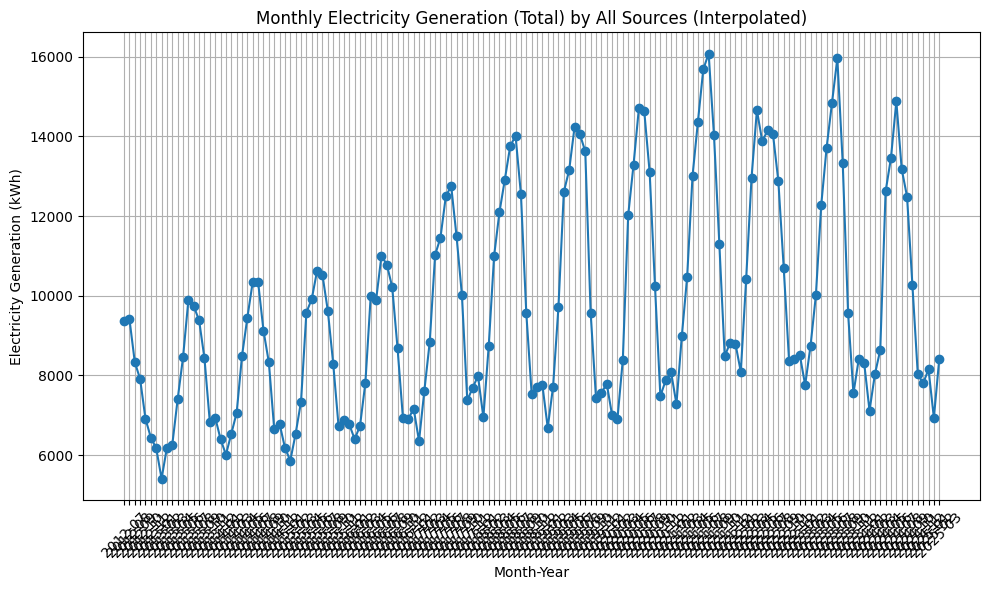

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import files  # Import for downloading files

# Load dataset
df = pd.read_csv('dataset.csv')  # Make sure the file is uploaded to Colab

# Filter for 'Total Electricity Generation by all sources'
df = df[df['Sequence No.'] == 10].copy()

# Handle 'Observation Date' and 'Observation Value'
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df = df.dropna(subset=['Observation Date'])

# Sort dataset by date
df = df.sort_values(by='Observation Date')

# Extract month and year from 'Observation Date'
df['Month-Year'] = df['Observation Date'].dt.to_period('M')

# Group by 'Month-Year' and sum 'Observation Value' (assuming this is in kWh)
monthly_data = df.groupby('Month-Year')['Observation Value'].sum().reset_index()

# Create a complete range of months from the start to the end of the data
start_date = df['Observation Date'].min().replace(day=1)  # Start from the first day of the month
end_date = df['Observation Date'].max().replace(day=1)    # End at the first day of the last month
all_months = pd.date_range(start=start_date, end=end_date, freq='MS').to_period('M')

# Merge the complete month list with the aggregated data
monthly_data_complete = pd.DataFrame(all_months, columns=['Month-Year'])
monthly_data_complete = pd.merge(monthly_data_complete, monthly_data, on='Month-Year', how='left')

# Perform forward and backward interpolation
monthly_data_complete['Observation Value'] = monthly_data_complete['Observation Value'].interpolate(method='pad').interpolate(method='bfill')

# Print the resulting dataset to check all months and corresponding values
print(monthly_data_complete)

# Save the data to an Excel file
excel_filename = '/content/monthly_data_interpolated.xlsx'  # Save file in Colab's environment
monthly_data_complete.to_excel(excel_filename, index=False)

print(f"Data has been saved to {excel_filename}")

# Download the file to your local PC
files.download(excel_filename)  # This will trigger the download to your PC

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data_complete['Month-Year'].astype(str), monthly_data_complete['Observation Value'], marker='o')
plt.title('Monthly Electricity Generation (Total) by All Sources (Interpolated)')
plt.xlabel('Month-Year')
plt.ylabel('Electricity Generation (kWh)')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


    Month-Year  Observation Value
0      2012-07        9364.441048
1      2012-08        9422.351018
2      2012-09        8337.673930
3      2012-10        7906.628593
4      2012-11        6907.884537
..         ...                ...
148    2024-11        8031.500000
149    2024-12        7799.690000
150    2025-01        8153.280000
151    2025-02        6933.870000
152    2025-03        8408.920000

[153 rows x 2 columns]
Data has been saved to /content/monthly_data_interpolated.csv


<ipython-input-3-63c507362002>:37: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_data_complete['Observation Value'] = monthly_data_complete['Observation Value'].interpolate(method='pad').interpolate(method='bfill')
<ipython-input-3-63c507362002>:37: FutureWarning: Series.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_data_complete['Observation Value'] = monthly_data_complete['Observation Value'].interpolate(method='pad').interpolate(method='bfill')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

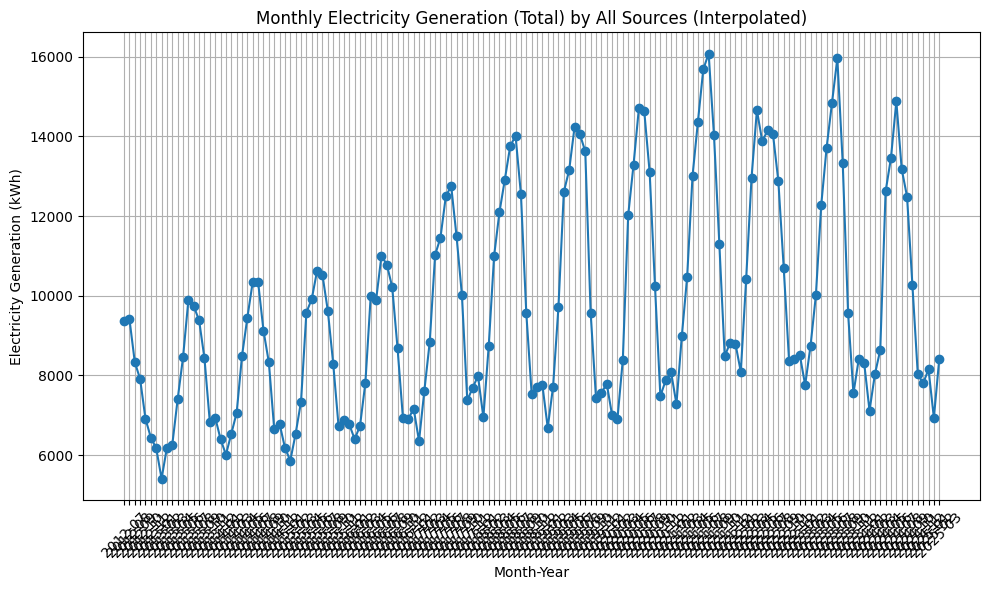

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import files  # For file download in Colab

# Load dataset
df = pd.read_csv('dataset.csv')  # Make sure the file is uploaded to Colab

# Filter for 'Total Electricity Generation by all sources'
df = df[df['Sequence No.'] == 10].copy()

# Handle 'Observation Date' and 'Observation Value'
df['Observation Date'] = pd.to_datetime(df['Observation Date'], errors='coerce')
df = df.dropna(subset=['Observation Date'])

# Sort dataset by date
df = df.sort_values(by='Observation Date')

# Extract month and year from 'Observation Date'
df['Month-Year'] = df['Observation Date'].dt.to_period('M')

# Group by 'Month-Year' and sum 'Observation Value'
monthly_data = df.groupby('Month-Year')['Observation Value'].sum().reset_index()

# Create a complete range of months from start to end
start_date = df['Observation Date'].min().replace(day=1)
end_date = df['Observation Date'].max().replace(day=1)
all_months = pd.date_range(start=start_date, end=end_date, freq='MS').to_period('M')

# Merge with complete month list
monthly_data_complete = pd.DataFrame(all_months, columns=['Month-Year'])
monthly_data_complete = pd.merge(monthly_data_complete, monthly_data, on='Month-Year', how='left')

# Interpolate missing values
monthly_data_complete['Observation Value'] = monthly_data_complete['Observation Value'].interpolate(method='pad').interpolate(method='bfill')

# Print the resulting dataset
print(monthly_data_complete)

# Save as CSV
csv_filename = '/content/monthly_data_interpolated.csv'
monthly_data_complete.to_csv(csv_filename, index=False)

print(f"Data has been saved to {csv_filename}")

# Download CSV
files.download(csv_filename)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data_complete['Month-Year'].astype(str), monthly_data_complete['Observation Value'], marker='o')
plt.title('Monthly Electricity Generation (Total) by All Sources (Interpolated)')
plt.xlabel('Month-Year')
plt.ylabel('Electricity Generation (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
pip install pandas==2.2.2 tensorflow==2.18.0 --force-reinstall


  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.3 MB/s eta 0:00:00
Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.2 MB/s eta 0:0